In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Prepare All Data

In [ ]:
R98 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R98.xlsx')
R99 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R99.xlsx')
R1400 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1400.xlsx')
R1401 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1401.xlsx')

U98 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U98.xlsx')
U99 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U99.xlsx')
U1400 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1400.xlsx')
U1401 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1401.xlsx')

In [ ]:
for i in [R98, R99, R1400, R1401, U98, U99 , U1400 , U1401]:
    print(i.info())
    print("="*50,end="\n\n")

In [ ]:
for i in [R98, R99, R1400, R1401, U98, U99 , U1400 , U1401]:
    print(i[(i.Takmil == 2) & (i.Jaygozin == 2)].shape[0])

## Social


In [307]:
R98_social = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R98.xlsx', sheet_name = 'R98P1')
R99_social  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R99.xlsx', sheet_name = 'R99P1')
R1400_social  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1400.xlsx', sheet_name = 'R1400P1')
R1401_social  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1401.xlsx', sheet_name = 'R1401P1')

U98_social = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U98.xlsx', sheet_name = 'U98P1')
U99_social  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U99.xlsx', sheet_name = 'U99P1')
U1400_social  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1400.xlsx', sheet_name = 'U1400P1')
U1401_social  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1401.xlsx', sheet_name = 'U1401P1')

In [308]:
R98_social['year'] = 98
R99_social['year'] = 99
R1400_social['year'] = 1400
R1401_social['year'] = 1401
U98_social['year'] = 98
U99_social['year'] = 99
U1400_social['year'] = 1400
U1401_social['year'] = 1401

In [ ]:
R98_social[R98_social.Address == 23001701020]

In [ ]:
R99_social[R99_social.Address == 23001701020]

In [ ]:
for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
    print(i.info())
    print("="*50,end="\n\n")

In [ ]:
for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
    print(i.isna().sum()*100/i.shape[0])
    print("="*50,end="\n\n")

In [ ]:
for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
    print(i[i.maritalst.isna()].age.max())

In [ ]:
R98_social[(R98_social.maritalst == 'Single') & (R98_social.age < 10)]

In [309]:
#طبق توضیحات پرسشنامه وضعیت زناشویی فقط برای افراد 10 ساله و بزرگتر پر میشود
for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
    i['maritalst'] = np.where((i.age < 10) & ((i.maritalst.isna()) | (i.maritalst == 'Single')), 'Not Applicable', i['maritalst'])

In [310]:
U1401_social[U1401_social.maritalst.isna()]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst,year
3678,10707086729,1,Head,NaN,70,literate,No,Diploma,IncomeWOJob,NaN,1401


In [311]:
U1401_social[U1401_social.Address == 10707086729]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst,year
3678,10707086729,1,Head,NaN,70,literate,No,Diploma,IncomeWOJob,NaN,1401
3679,10707086729,2,Spouse,Female,70,literate,No,Diploma,Housewife,Married,1401
3680,10707086729,3,Child,Female,37,literate,No,Bachelor,unemployed,Single,1401


In [312]:
U1401_social.loc[3678, 'gender'] = 'Male'
U1401_social.loc[3678, 'maritalst'] = 'Married'

In [313]:
#طبق توضیحات پرسشنامه اطلاعات مربوط به وضع تحصیل و سطح سواد برای افراد 6ساله و بزرگتر پر میشود

not_applicable_under6 = ['literacy', 'studying', 'degree', 'occupationalst']

for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
    for j in not_applicable_under6:
        i[j] = np.where((i.age < 6) & (i[j].isna()), 'Not Applicable', i[j])

In [314]:
for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
    i['occupationalst'] = np.where((i.studying == 'Yes') & (i['occupationalst'].isna()), 'Student', i['occupationalst'])

In [315]:
for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
    print(i[i.occupationalst.isna()].age.max())

9
9
9
9
9
9
9
9


In [316]:
for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
    print(i[(i.studying.isna()) & i.occupationalst == 'Student'].shape[0])

0
0
0
0
0
0
0
0


In [317]:
R98_social[(R98_social.studying.isna()) & (R98_social.age > 18) & (R98_social.literacy == 'literate')]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst,year


In [318]:
#طبق توضیحات پرسشنامه مدرک و دوره تحصیلی فقط برای افراد باسواد پر میشود

for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
    i['degree'] = np.where((i.degree.isna()) & (i.age > 18) & (i.literacy == 'illiterate') , 'illiterate', i['degree'])

In [319]:
for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
    i['studying'] = np.where((i.studying.isna()) & (i.age > 18), 'No', i['studying'])

In [320]:
U1401_social[U1401_social.gender.isna()]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst,year
48797,10001001638,1,Head,NaN,40,literate,No,Secondary,employed,Married,1401


In [321]:
U1401_social[U1401_social.Address == 10001001638]

,Address,member,relation,gender,age,literacy,studying,degree,occupationalst,maritalst,year
48797,10001001638,1,Head,NaN,40,literate,No,Secondary,employed,Married,1401
48798,10001001638,2,Spouse,Female,37,literate,No,Diploma,Housewife,Married,1401
48799,10001001638,3,Child,Female,15,literate,Yes,Elemantry,Student,Single,1401
48800,10001001638,4,Child,Female,8,literate,Yes,Elemantry,Student,Not Applicable,1401


In [322]:
U1401_social.loc[48797, 'gender'] = 'Male'

In [323]:
for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
    print(i[(i.degree.isna()) & i.literacy == 'literate'].shape[0])

0
0
0
0
0
0
0
0


In [324]:
for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
    i['studying'] = np.where((i.studying.isna()) & (i.age == 7), 'Yes', i['studying'])
    i['degree'] = np.where((i.degree.isna()) & (i.age == 7), 'Elemantry', i['degree'])

In [325]:
for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
    i['studying'] = np.where(i.studying.isna(), 'No', i['studying'])
    i['degree'] = np.where(i.degree.isna(), 'illiterate', i['degree'])

In [326]:
for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
  print(i[i.literacy.isna()].age.max())

6
6
6
6
6
6
6
6


In [327]:
for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
  i['literacy'] = np.where(i.literacy.isna(), 'illiterate', i['literacy'])

In [ ]:
for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
  print(i[i.occupationalst.isna()].age.max())

In [328]:
for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
  i['occupationalst'] = np.where((i.occupationalst.isna()) & (i.studying == 'Yes'), 'Student', i['occupationalst'])

In [ ]:
R98_social[R98_social.occupationalst.isna()]

In [329]:
for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
  i['occupationalst'] = np.where(i.occupationalst.isna(), 'Not Applicable', i['occupationalst'])

In [ ]:
for i in [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]:
    print(i.isna().sum()*100/i.shape[0])
    print("="*50,end="\n\n")

# Preparing Costs Data

## Housing

In [100]:
R98_housing = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R98.xlsx', sheet_name = 'R98P2')
R99_housing  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R99.xlsx', sheet_name = 'R99P2')
R1400_housing  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1400.xlsx', sheet_name = 'R1400P2')
R1401_housing  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1401.xlsx', sheet_name = 'R1401P2')

U98_housing = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U98.xlsx', sheet_name = 'U98P2')
U99_housing = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U99.xlsx', sheet_name = 'U99P2')
U1400_housing = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1400.xlsx', sheet_name = 'U1400P2')
U1401_housing = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1401.xlsx', sheet_name = 'U1401P2')

In [ ]:
U1401_housing.head()

In [ ]:
for i in [R98_housing, R99_housing, R1400_housing, R1401_housing, U98_housing, U99_housing , U1400_housing, U1401_housing]:
    print(i.isna().sum()*100/i.shape[0])
    print()
    print(i.shape)
    print("="*50,end="\n\n")

In [101]:
for i in [R98_housing, R99_housing, R1400_housing, R1401_housing, U98_housing, U99_housing , U1400_housing, U1401_housing]:
    i = i.drop(columns = 'material', inplace = True)

In [102]:
for i in [R98_housing, R99_housing, R1400_housing, R1401_housing, U98_housing, U99_housing , U1400_housing, U1401_housing]:
    print(i[i.heatingfuel != i.waterheatingfuel].shape[0])

3231
2544
3062
1615
1468
1233
2962
856


In [ ]:
for i in [R98_housing, R99_housing, R1400_housing, R1401_housing, U98_housing, U99_housing , U1400_housing, U1401_housing]:
    print(i[i.heatingfuel == i.waterheatingfuel].shape[0])

In [ ]:
for i in [R98_housing, R99_housing, R1400_housing, R1401_housing, U98_housing, U99_housing , U1400_housing, U1401_housing]:
    print(i[(i.heatingfuel.isna()) & (i.waterheatingfuel.isna())].shape[0])

## Food Costs

In [103]:
R98_food = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R98.xlsx', sheet_name = 'R98P3S01')
R99_food  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R99.xlsx', sheet_name = 'R99P3S01')
R1400_food  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1400.xlsx', sheet_name = 'R1400P3S01')
R1401_food  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1401.xlsx', sheet_name = 'R1401P3S01')

U98_food = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U98.xlsx', sheet_name = 'U98P3S01')
U99_food = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U99.xlsx', sheet_name = 'U99P3S01')
U1400_food = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1400.xlsx', sheet_name = 'U1400P3S01')
U1401_food = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1401.xlsx', sheet_name = 'U1401P3S01')

In [ ]:
R1401_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489676 entries, 0 to 489675
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Address    489676 non-null  int64  
 1   code       489676 non-null  int64  
 2   purchased  489676 non-null  int64  
 3   gram       128969 non-null  float64
 4   kilogram   371396 non-null  float64
 5   price      489676 non-null  int64  
 6   value      489676 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 26.2 MB


In [ ]:
for i in [R98_food, R99_food, R1400_food, R1401_food, U98_food, U99_food , U1400_food, U1401_food]:
    print(i.isna().sum()*100/i.shape[0])
    print()
    print(i.shape)
    print("="*50,end="\n\n")

In [ ]:
R98_food[R98_food.value.isna()]

In [ ]:
R99_food[R99_food.value.isna()]

In [ ]:
for i in [R98_food, R99_food, R1400_food, R1401_food, U98_food, U99_food , U1400_food, U1401_food]:
     print(i[(i.gram.isna()) & (i.kilogram.isna())].shape[0])

In [ ]:
for i in [R98_food, R99_food, R1400_food, R1401_food, U98_food, U99_food , U1400_food, U1401_food]:
     print(i[(i.value.isna())].shape[0])

In [104]:
for i in [R98_food, R99_food, R1400_food, R1401_food, U98_food, U99_food , U1400_food, U1401_food]:
  i = i.dropna(subset=['value'])

In [105]:
U1400_food = U1400_food.dropna(subset=['value'])

## Drink Costs

In [106]:
R98_drink = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R98.xlsx', sheet_name = 'R98P3S02')
R99_drink  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R99.xlsx', sheet_name = 'R99P3S02')
R1400_drink  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1400.xlsx', sheet_name = 'R1400P3S02')
R1401_drink  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1401.xlsx', sheet_name = 'R1401P3S02')

U98_drink = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U98.xlsx', sheet_name = 'U98P3S02')
U99_drink = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U99.xlsx', sheet_name = 'U99P3S02')
U1400_drink = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1400.xlsx', sheet_name = 'U1400P3S02')
U1401_drink = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1401.xlsx', sheet_name = 'U1401P3S02')

In [ ]:
R98_drink.info()

In [ ]:
for i in [R98_drink, R99_drink, R1400_drink, R1401_drink, U98_drink, U99_drink , U1400_drink, U1401_drink]:
    print(i.isna().sum()*100/i.shape[0])
    print("="*50,end="\n\n")

In [107]:
for i in [R98_drink, R99_drink, R1400_drink, R1401_drink, U98_drink, U99_drink , U1400_drink, U1401_drink]:
    i = i.drop(columns = 'gram', inplace = True)

In [ ]:
for i in [R98_drink, R99_drink, R1400_drink, R1401_drink, U98_drink, U99_drink , U1400_drink, U1401_drink]:
     print(i[(i.value.isna())].shape[0])

0
0
0
0
0
0
0
0


## Clothing Costs

In [108]:
R98_clothing = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R98.xlsx', sheet_name = 'R98P3S03')
R99_clothing  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R99.xlsx', sheet_name = 'R99P3S03')
R1400_clothing  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1400.xlsx', sheet_name = 'R1400P3S03')
R1401_clothing  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1401.xlsx', sheet_name = 'R1401P3S03')

U98_clothing = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U98.xlsx', sheet_name = 'U98P3S03')
U99_clothing = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U99.xlsx', sheet_name = 'U99P3S03')
U1400_clothing = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1400.xlsx', sheet_name = 'U1400P3S03')
U1401_clothing = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1401.xlsx', sheet_name = 'U1401P3S03')

In [ ]:
for i in [R98_clothing, R99_clothing, R1400_clothing, R1401_clothing, U98_clothing, U99_clothing, U1400_clothing, U1401_clothing]:
    print(i.isna().sum()*100/i.shape[0])
    print()
    print(i.shape)
    print("="*50,end="\n\n")

## Not Food Costs


In [109]:
R98_restaurant = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R98.xlsx', sheet_name = 'R98P3S11')
R99_restaurant  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R99.xlsx', sheet_name = 'R99P3S11')
R1400_restaurant  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1400.xlsx', sheet_name = 'R1400P3S11')
R1401_restaurant  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1401.xlsx', sheet_name = 'R1401P3S11')

U98_restaurant = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U98.xlsx', sheet_name = 'U98P3S11')
U99_restaurant  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U99.xlsx', sheet_name = 'U99P3S11')
U1400_restaurant = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1400.xlsx', sheet_name = 'U1400P3S11')
U1401_restaurant  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1401.xlsx', sheet_name = 'U1401P3S11')

In [ ]:
R98_restaurant.head()

In [ ]:
for i in [R98_restaurant, R99_restaurant, R1400_restaurant, R1401_restaurant, U98_restaurant, U99_restaurant, U1400_restaurant, U1401_restaurant]:
    print(i.isna().sum()*100/i.shape[0])
    print()
    print(i.shape)
    print("="*50,end="\n\n")

In [110]:
family_restaurant=[]
for i in [R98_restaurant, R99_restaurant, R1400_restaurant, R1401_restaurant, U98_restaurant, U99_restaurant, U1400_restaurant, U1401_restaurant]:
    df = i.groupby('Address')['value'].sum().reset_index()
    family_restaurant.append(df)

In [111]:
family_restaurant[0]

,Address,value
0,20001383920,300000
1,20001384120,600000
2,20001384123,300000
3,20001384207,300000
4,20001384220,420000
...,...,...
4439,23006709112,640000
4440,23006709216,3800000
4441,23006709220,3400000
4442,23006709223,4100000


## Remaining Costs

In [112]:
files = [
    '/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R98',
    '/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R99',
    '/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1400',
    '/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1401',
    '/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U98',
    '/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U99',
    '/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1400',
    '/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1401'
]

sheets = ['R98', 'R99', 'R1400', 'R1401', 'U98', 'U99', 'U1400', 'U1401']
total_cost = []

for file, sheet in zip(files, sheets):
    sheet_names = [f'{sheet}P3S05', f'{sheet}P3S07', f'{sheet}P3S08', f'{sheet}P3S09', f'{sheet}P3S10', f'{sheet}P3S12']

    dfs = [pd.read_excel(f'{file}.xlsx', sheet_name=sheet_name) for sheet_name in sheet_names]

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df = combined_df.drop(columns=['code', 'purchased'])

    result_df = combined_df.groupby('Address', as_index=False)['value'].sum()

    total_cost.append(result_df)

# final_nonfood = pd.concat(total_cost, ignore_index=True)

In [ ]:
total_cost[1]

In [113]:
df_98_remaining_cost = pd.DataFrame({
    '98_Address' :  pd.concat([total_cost[0].Address, total_cost[4].Address], axis=0, ignore_index=True),
    '98_value' : pd.concat([total_cost[0].value, total_cost[4].value], axis=0, ignore_index=True) })
df_99_remaining_cost = pd.DataFrame({
    '9_Address' : pd.concat([total_cost[1].Address, total_cost[5].Address], axis=0, ignore_index=True),
    '99_value' : pd.concat([total_cost[1].value, total_cost[5].value], axis=0, ignore_index=True)})
df_1400_remaining_cost = pd.DataFrame({
    '1400_Address' : pd.concat([total_cost[2].Address, total_cost[6].Address], axis=0, ignore_index=True),
    '1400_value' : pd.concat([total_cost[2].value, total_cost[6].value ], axis=0, ignore_index=True) })
df_1401_remaining_cost = pd.DataFrame({
    '1401_Address' : pd.concat([total_cost[3].Address, total_cost[7].Address ], axis=0, ignore_index=True),
    '1401_value' : pd.concat([total_cost[3].value, total_cost[7].value], axis=0, ignore_index=True) })

df_98_remaining_cost

,98_Address,98_value
0,20001383908,4180000
1,20001383911,784000
2,20001383915,2190000
3,20001383916,2910000
4,20001383920,2290000
...,...,...
38099,13006383810,1080000
38100,13006383814,3037000
38101,13006383815,160000
38102,13006383820,4590000


## Housing Costs

In [114]:
R98_housing_costs = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R98.xlsx', sheet_name = 'R98P3S04')
R99_housing_costs  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R99.xlsx', sheet_name = 'R99P3S04')
R1400_housing_costs  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1400.xlsx', sheet_name = 'R1400P3S04')
R1401_housing_costs  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1401.xlsx', sheet_name = 'R1401P3S04')

U98_housing_costs = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U98.xlsx', sheet_name = 'U98P3S04')
U99_housing_costs = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U99.xlsx', sheet_name = 'U99P3S04')
U1400_housing_costs = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1400.xlsx', sheet_name = 'U1400P3S04')
U1401_housing_costs = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1401.xlsx', sheet_name = 'U1401P3S04')

In [ ]:
R98_housing_costs.head()

In [ ]:
for i in [R98_housing_costs, R99_housing_costs, R1400_housing_costs, R1401_housing_costs, U98_housing_costs, U99_housing_costs , U1400_housing_costs, U1401_housing_costs]:
    print(i.isna().sum())
    print()
    print(i.shape)
    print("="*50,end="\n\n")

## Healthcare Costs

In [115]:
R98_health = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R98.xlsx', sheet_name = 'R98P3S06')
R99_health  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R99.xlsx', sheet_name = 'R99P3S06')
R1400_health  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1400.xlsx', sheet_name = 'R1400P3S06')
R1401_health  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1401.xlsx', sheet_name = 'R1401P3S06')

U98_health = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U98.xlsx', sheet_name = 'U98P3S06')
U99_health = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U99.xlsx', sheet_name = 'U99P3S06')
U1400_health = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1400.xlsx', sheet_name = 'U1400P3S06')
U1401_health = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1401.xlsx', sheet_name = 'U1401P3S06')

In [ ]:
for i in [R98_health, R99_health, R1400_health, R1401_health, U98_health, U99_health , U1400_health, U1401_health]:
    print(i.isna().sum())
    print()
    print(i.shape)
    print("="*50,end="\n\n")

## Other Costs

In [116]:
R98_other = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R98.xlsx', sheet_name = 'R98P3S13')
R99_other  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R99.xlsx', sheet_name = 'R99P3S13')
R1400_other  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1400.xlsx', sheet_name = 'R1400P3S13')
R1401_other  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1401.xlsx', sheet_name = 'R1401P3S13')

U98_other = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U98.xlsx', sheet_name = 'U98P3S13')
U99_other = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U99.xlsx', sheet_name = 'U99P3S13')
U1400_other = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1400.xlsx', sheet_name = 'U1400P3S13')
U1401_other = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1401.xlsx', sheet_name = 'U1401P3S13')

In [ ]:
R98_other.info()

In [ ]:
U98_other.head()

In [ ]:
for i in [R98_tp_costs, R99_tp_costs, R1400_tp_costs, R1401_tp_costs, U98_tp_costs, U99_tp_costs , U1400_tp_costs, U1401_tp_costs]:
    print(i.isna().sum()*100/i.shape[0])
    print("="*50,end="\n\n")

## Investments

In [117]:
R98_investments = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R98.xlsx', sheet_name = 'R98P3S14')
R99_investments = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R99.xlsx', sheet_name = 'R99P3S14')
R1400_investments = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1400.xlsx', sheet_name = 'R1400P3S14')
R1401_investments = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1401.xlsx', sheet_name = 'R1401P3S14')

U98_investments = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U98.xlsx', sheet_name = 'U98P3S14')
U99_investments = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U99.xlsx', sheet_name = 'U99P3S14')
U1400_investments = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1400.xlsx', sheet_name = 'U1400P3S14')
U1401_investments = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1401.xlsx', sheet_name = 'U1401P3S14')

In [118]:
U1401_investments.value = ((U1401_investments.value.str.extract(r'([1-9]\d*)')).fillna(0)).astype(int)

In [ ]:
U1401_investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Address    2207 non-null   int64
 1   code       2207 non-null   int64
 2   purchased  2207 non-null   int64
 3   value      2207 non-null   int64
dtypes: int64(4)
memory usage: 69.1 KB


In [119]:
R1401_investments.value = ((R1401_investments.value.str.extract(r'([1-9]\d*)')).fillna(0)).astype(int)

In [ ]:
for i in [R98_investments, R99_investments, R1400_investments, R1401_investments, U98_investments, U99_investments, U1400_investments, U1401_investments]:
    print(i.value.isna().sum()*100/i.shape[0])
    print("="*50,end="\n\n")

3.122863004330978

5.242997366531003

6.028898854010961

0.0

2.6084010840108403

3.988501616960115

4.784499802293396

0.0



# Preparing Incomes Data

## Income 1

In [ ]:
R98_income1 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R98.xlsx', sheet_name = 'R98P4S01')
R99_income1 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R99.xlsx', sheet_name = 'R99P4S01')
R1400_income1 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1400.xlsx', sheet_name = 'R1400P4S01')
R1401_income1 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1401.xlsx', sheet_name = 'R1401P4S01')

U98_income1 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U98.xlsx', sheet_name = 'U98P4S01')
U99_income1 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U99.xlsx', sheet_name = 'U99P4S01')
U1400_income1 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1400.xlsx', sheet_name = 'U1400P4S01')
U1401_income1 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1401.xlsx', sheet_name = 'U1401P4S01')

In [ ]:
family_income1=[]
for i in [R98_income1, R99_income1, R1400_income1, R1401_income1, U98_income1, U99_income1, U1400_income1, U1401_income1]:
    df = i.groupby('Address')['netincome_w_y'].sum().reset_index()
    family_income1.append(df)

In [ ]:
for i in [0,2,3,4,5,6,7]:
  print(family_income1[i].netincome_w_y.describe())
  print("="*50,end="\n\n")

count    8.624000e+03
mean     1.816019e+08
std      1.351399e+08
min      0.000000e+00
25%      8.768000e+07
50%      1.500000e+08
75%      2.400000e+08
max      2.554000e+09
Name: netincome_w_y, dtype: float64

count    8.696000e+03
mean     4.209618e+08
std      3.022929e+08
min      0.000000e+00
25%      2.100000e+08
50%      3.600000e+08
75%      5.610000e+08
max      3.953000e+09
Name: netincome_w_y, dtype: float64

count    8.386000e+03
mean     6.509592e+08
std      4.381201e+08
min      0.000000e+00
25%      3.525000e+08
50%      6.000000e+08
75%      8.500000e+08
max      4.228400e+09
Name: netincome_w_y, dtype: float64

count    1.043300e+04
mean     2.684511e+08
std      2.046160e+08
min      0.000000e+00
25%      1.338480e+08
50%      2.293520e+08
75%      3.532000e+08
max      4.267560e+09
Name: netincome_w_y, dtype: float64

count    1.005700e+04
mean     3.685720e+08
std      2.749873e+08
min      0.000000e+00
25%      1.800000e+08
50%      3.150000e+08
75%      4.80000

In [ ]:
R98_income1.head()

In [ ]:
for i in [R98_income1, R99_income1, R1400_income1, R1401_income1, U98_income1, U99_income1, U1400_income1, U1401_income1]:
    print(i.isna().sum()*100/i.shape[0])
    print("="*50,end="\n\n")

## Income 2

In [ ]:
R98_income2 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R98.xlsx', sheet_name = 'R98P4S02')
R99_income2 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R99.xlsx', sheet_name = 'R99P4S02')
R1400_income2 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1400.xlsx', sheet_name = 'R1400P4S02')
R1401_income2 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1401.xlsx', sheet_name = 'R1401P4S02')

U98_income2 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U98.xlsx', sheet_name = 'U98P4S02')
U99_income2 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U99.xlsx', sheet_name = 'U99P4S02')
U1400_income2 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1400.xlsx', sheet_name = 'U1400P4S02')
U1401_income2 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1401.xlsx', sheet_name = 'U1401P4S02')

In [ ]:
R98_income2.info() # sale - cost_employment -  cost_raw - cost_machinery - cost_others - cost_tax

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14339 entries, 0 to 14338
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          14339 non-null  int64  
 1   member           14339 non-null  int64  
 2   employed_s       14339 non-null  int64  
 3   ISCO_s           14339 non-null  int64  
 4   ISIC_s           14339 non-null  int64  
 5   status_s         14339 non-null  int64  
 6   agriculture      14339 non-null  int64  
 7   hours_s          14086 non-null  float64
 8   days_s           14086 non-null  float64
 9   cost_employment  12935 non-null  float64
 10  cost_raw         14035 non-null  float64
 11  cost_machinery   13085 non-null  float64
 12  cost_others      13606 non-null  float64
 13  cost_tax         12548 non-null  float64
 14  sale             14108 non-null  float64
 15  income_s_y       14339 non-null  int64  
 16  Fasl             14339 non-null  int64  
 17  year        

In [ ]:
for i in [R98_income2, R99_income2, R1400_income2, R1401_income2, U98_income2, U99_income2, U1400_income2, U1401_income2]:
    print(i.isna().sum()*100/i.shape[0])
    print("="*50,end="\n\n")

In [ ]:
U98_income2[U98_income2.income_s_y.isna()]

In [ ]:
R99_income2[R99_income2.income_s_y.isna()]

In [ ]:
import re

for i in R1401_income2[R1401_income2.income_s_y.str.contains(r'\s+', na=False)].index:
    split = re.split(r'\s+', R1401_income2.iloc[i, 15])
    if split[0] == '':
        split[0] = 0
    if split[1] == '':
        split[1] = 0
    R1401_income2.iloc[i, 15] = float(split[0]) + float(split[1])
R1401_income2.income_s_y = R1401_income2.income_s_y.astype('float')

for i in U1401_income2[U1401_income2.income_s_y.str.contains(r'\s+', na=False)].index:
    split = re.split(r'\s+', U1401_income2.iloc[i, 15])
    if split[0] == '':
        split[0] = 0
    if split[1] == '':
        split[1] = 0
    U1401_income2.iloc[i, 15] = float(split[0]) + float(split[1])
U1401_income2.income_s_y = U1401_income2.income_s_y.astype('float')

In [ ]:
for i in [R98_income2, R99_income2, R1400_income2, R1401_income2, U98_income2, U99_income2, U1400_income2, U1401_income2]:
  i.dropna(subset=['income_s_y'], inplace = True)
  i['cost_machinery'] = i['cost_machinery'].fillna(0)
  i['cost_others'] = i['cost_others'].fillna(0)
  i['cost_employment'] = i['cost_employment'].fillna(0)
  i['cost_tax'] = i['cost_tax'].fillna(0)

In [ ]:
for df in [R98_income2, R99_income2, R1400_income2, R1401_income2, U98_income2, U99_income2, U1400_income2, U1401_income2]:
    df['corrected_tax'] = df['sale'] - (df['income_s_y'] + df['cost_employment'] +
                                         df['cost_raw'] + df['cost_machinery'] +
                                         df['cost_others'])
    df['cost_tax'] = np.where(df['cost_tax'] == 0,df['corrected_tax'], df['cost_tax'])
    df['cost_tax'] = np.where((df['cost_tax'] == 0) & (df['corrected_tax'] == 0), df['sale'] * 0.09, df['cost_tax'])
    df['corrected_income'] = df['sale'] - df['cost_tax']
    df['total_cost'] = (df['sale'] - df['cost_employment'] -
                        df['cost_raw'] - df['cost_machinery'] -
                        df['cost_others'] - df['cost_tax'])
R99_income2.head()

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,hours_s,days_s,cost_employment,...,cost_others,cost_tax,sale,income_s_y,Fasl,year,DYCOL00,corrected_tax,corrected_income,total_cost
0,20011394626,3.0,1.0,6111.0,1110.0,5.0,1,6.0,3.0,10000000.0,...,60000000.0,23400000.0,260000000.0,128000000.0,1,1399,NaN,0.0,236600000.0,104600000.0
1,20011394626,3.0,1.0,6121.0,1440.0,5.0,1,4.0,7.0,8000000.0,...,0.0,26550000.0,295000000.0,87000000.0,1,1399,NaN,0.0,268450000.0,60450000.0
2,20011394623,1.0,1.0,6121.0,1440.0,5.0,1,8.0,7.0,1800000.0,...,0.0,11160000.0,124000000.0,51550000.0,1,1399,NaN,0.0,112840000.0,40390000.0
3,20011394614,1.0,1.0,6111.0,1110.0,5.0,1,6.0,3.0,0.0,...,70000000.0,34200000.0,380000000.0,256000000.0,1,1399,NaN,0.0,345800000.0,221800000.0
4,20011394614,1.0,1.0,6121.0,1440.0,5.0,1,6.0,7.0,0.0,...,0.0,9900000.0,110000000.0,60000000.0,1,1399,NaN,0.0,100100000.0,50100000.0


In [ ]:
R1400_income2[['corrected_tax','cost_tax']].describe() #12194
#R1400_income2[R1400_income2['corrected_tax']==R1400_income2['cost_tax']] #2440
# inc_dif = (R1400_income2['income_s_y'] - R1400_income2['total_cost'] )/R1400_income2['income_s_y']
# inc_dif
#R1400_income2.info()

,corrected_tax,cost_tax
count,1.188200e+04,1.188500e+04
mean,9.806354e+05,4.961050e+07
std,7.897308e+07,1.554792e+08
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,5.850000e+06
50%,0.000000e+00,2.250000e+07
75%,0.000000e+00,5.130000e+07
max,8.600000e+09,8.600000e+09


In [ ]:
R1400_income2[R1400_income2['income_s_y'] < 0][['total_cost', 'income_s_y']]

,total_cost,income_s_y
166,-166500000.0,-166500000
242,-138300000.0,-127500000
397,-85700000.0,-74000000
398,-24270000.0,-19500000
446,-161900000.0,-80000000
...,...,...
11439,-40000000.0,-40000000
11440,-42000000.0,-6000000
11572,-20000000.0,-20000000
11609,-7280000.0,-6200000


In [ ]:
# Filter for rows where income is negative
negative_cost_rows = R1400_income2[R1400_income2['income_s_y'] < 0]
negative_cost_rows[['sale', 'cost_employment', 'cost_raw', 'cost_machinery', 'cost_others', 'cost_tax', 'total_cost']].head()
negative_cost_rows

,Address,member,employed_s,ISCO_s,ISIC_s,status_s,agriculture,hours_s,days_s,cost_employment,cost_raw,cost_machinery,cost_others,cost_tax,sale,income_s_y,Fasl,year,DYCOL00,total_cost
166,20106401035,1,1,6121,1411,5,1,3.0,7.0,0.0,165000000.0,0.0,1500000.0,0.0,0.0,-166500000,1,1401,NaN,-166500000.0
242,20225415930,1,1,6121,1440,5,1,5.0,7.0,2500000.0,240000000.0,0.0,5000000.0,0.0,120000000.0,-127500000,1,1401,NaN,-127500000.0
397,20323426326,1,1,6121,1411,5,1,4.0,7.0,0.0,204000000.0,0.0,0.0,0.0,130000000.0,-74000000,1,1401,NaN,-74000000.0
398,20323426326,1,1,6111,1110,5,1,3.0,3.0,0.0,67500000.0,0.0,5000000.0,0.0,53000000.0,-19500000,1,1401,NaN,-19500000.0
446,20305418723,1,1,6121,1440,5,1,7.0,7.0,200000000.0,760000000.0,0.0,30000000.0,0.0,910000000.0,-80000000,1,1401,NaN,-80000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11439,22111619726,1,1,6121,1440,5,1,1.0,7.0,0.0,40000000.0,0.0,0.0,0.0,0.0,-40000000,4,1401,NaN,-40000000.0
11440,22111619729,1,1,6112,1240,5,1,3.0,6.0,40000000.0,322000000.0,0.0,44000000.0,0.0,400000000.0,-6000000,4,1401,NaN,-6000000.0
11572,22403642429,1,1,6112,1230,5,1,3.0,2.0,0.0,20000000.0,0.0,0.0,0.0,0.0,-20000000,4,1401,NaN,-20000000.0
11609,22407646035,1,1,6111,1110,5,1,7.0,4.0,0.0,13200000.0,0.0,5000000.0,0.0,12000000.0,-6200000,4,1401,NaN,-6200000.0


In [ ]:
family_income2=[]
for i in [R98_income2, R99_income2, R1400_income2, R1401_income2, U98_income2, U99_income2, U1400_income2, U1401_income2]:
    df = i.groupby('Address')['corrected_income'].sum().reset_index()
    family_income2.append(df)

In [ ]:
for i in [0,2,3,4,5,6,7]:
  print(family_income2[i].income_s_y.describe())
  print("="*50,end="\n\n")

count    8.300000e+03
mean     2.056259e+08
std      2.382631e+08
min     -5.928000e+08
25%      7.600000e+07
50%      1.500000e+08
75%      2.610000e+08
max      4.680000e+09
Name: income_s_y, dtype: float64

count    7.486000e+03
mean     4.380117e+08
std      7.625913e+08
min     -2.270000e+09
25%      1.420000e+08
50%      3.050000e+08
75%      5.430000e+08
max      3.908054e+10
Name: income_s_y, dtype: float64

count    7.103000e+03
mean     6.689240e+08
std      9.773366e+08
min     -2.671000e+10
25%      2.375000e+08
50%      4.900000e+08
75%      8.442500e+08
max      3.641360e+10
Name: income_s_y, dtype: float64

count    6.071000e+03
mean     2.528663e+08
std      2.850152e+08
min     -1.260000e+09
25%      1.200000e+08
50%      2.000000e+08
75%      3.100000e+08
max      7.610000e+09
Name: income_s_y, dtype: float64

count    5.370000e+03
mean     3.675807e+08
std      6.346035e+08
min     -1.500000e+09
25%      1.600000e+08
50%      2.850000e+08
75%      4.350000e+08
max   

In [ ]:
family_income2[0]

,Address,corrected_income
0,20001383908,691600000.0
1,20001383915,250250000.0
2,20001384008,83720000.0
3,20001384014,195650000.0
4,20001384020,81900000.0
...,...,...
8295,23006709520,830000000.0
8296,23006709523,376000000.0
8297,23006709608,500000000.0
8298,23006709617,140000000.0


## Income 3

In [ ]:
R98_income3 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R98.xlsx', sheet_name = 'R98P4S03')
R99_income3 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R99.xlsx', sheet_name = 'R99P4S03')
R1400_income3 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1400.xlsx', sheet_name = 'R1400P4S03')
R1401_income3 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1401.xlsx', sheet_name = 'R1401P4S03')

U98_income3 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U98.xlsx', sheet_name = 'U98P4S03')
U99_income3 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U99.xlsx', sheet_name = 'U99P4S03')
U1400_income3 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1400.xlsx', sheet_name = 'U1400P4S03')
U1401_income3 = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1401.xlsx', sheet_name = 'U1401P4S03')

In [ ]:
R98_income3.head()

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year,DYCOL00
0,20001385412,1,NaN,0024600000,NaN,NaN,NaN,NaN,1,98,NaN
1,20001385423,1,0154000000,NaN,NaN,NaN,NaN,NaN,1,98,NaN
2,20001385420,1,0130000000,NaN,NaN,NaN,NaN,NaN,1,98,NaN
3,20011395423,1,NaN,NaN,NaN,NaN,5000000.0,5000000.0,1,98,NaN
4,20011395416,1,NaN,0080000000,NaN,12000000.0,NaN,NaN,1,98,NaN


In [ ]:
for i in [R98_income3, R99_income3, R1400_income3, R1401_income3, U98_income3, U99_income3, U1400_income3, U1401_income3]:
    print(i.isna().sum()*100/i.shape[0])
    print()
    print(i.shape)
    print("="*50,end="\n\n")

In [ ]:
for i in [R98_income3, R99_income3, R1400_income3, R1401_income3, U98_income3, U99_income3, U1400_income3, U1401_income3]:
    print(i.info())
    print(i.shape)
    print("="*50,end="\n\n")

In [ ]:
for i in [R98_income3, R99_income3, R1400_income3, R1401_income3, U98_income3, U99_income3, U1400_income3, U1401_income3]:
    i.fillna(0, inplace = True)

In [ ]:
U1400_income3[U1400_income3['income_pension'] == '\n'] = 0

In [ ]:
U1400_income3['income_pension'] = U1400_income3['income_pension'].astype('float')

In [ ]:
for col in U99_income3.select_dtypes(include='object').columns:
    U99_income3[col] = U99_income3[col].str.strip().replace('\n', 0)
    U99_income3[col] = U99_income3[col].str.strip().replace('', 0)
    U99_income3[col] = U99_income3[col].astype(float)

In [ ]:
for col in R98_income3.select_dtypes(include='object').columns:
    R98_income3[col] = R98_income3[col].str.strip().replace('\n', 0)
    R98_income3[col] = R98_income3[col].str.strip().replace('', 0)
    R98_income3[col] = R98_income3[col].astype(float)

In [ ]:
for col in R99_income3.select_dtypes(include='object').columns:
    R99_income3[col] = R99_income3[col].str.strip().replace('\n', 0)
    R99_income3[col] = R99_income3[col].str.strip().replace('', 0)
    R99_income3[col] = R99_income3[col].astype(float)

In [ ]:
for col in R1400_income3.select_dtypes(include='object').columns:
    R1400_income3[col] = R1400_income3[col].str.strip().replace('\n', 0)
    R1400_income3[col] = R1400_income3[col].str.strip().replace('', 0)
    R1400_income3[col] = R1400_income3[col].astype(float)

In [ ]:
for col in U98_income3.select_dtypes(include='object').columns:
    U98_income3[col] = U98_income3[col].str.strip().replace('\n', 0)
    U98_income3[col] = U98_income3[col].str.strip().replace('', 0)
    U98_income3[col] = U98_income3[col].astype(float)

In [ ]:
R98_income3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18827 entries, 0 to 18826
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Address          18827 non-null  int64  
 1   member           18827 non-null  int64  
 2   income_pension   6193 non-null   float64
 3   income_rent      5491 non-null   float64
 4   income_interest  13222 non-null  float64
 5   income_aid       10355 non-null  float64
 6   income_resale    4873 non-null   float64
 7   income_transfer  8242 non-null   float64
 8   Fasl             18827 non-null  int64  
 9   year             18827 non-null  int64  
 10  DYCOL00          0 non-null      float64
dtypes: float64(7), int64(4)
memory usage: 1.6 MB


In [ ]:
for i in [R98_income3, R99_income3, R1400_income3, R1401_income3, U98_income3, U99_income3, U1400_income3, U1401_income3]:
    i.fillna(0, inplace = True)

In [ ]:
for i in [R98_income3, R99_income3, R1400_income3, R1401_income3, U98_income3, U99_income3, U1400_income3, U1401_income3]:
    i['other incomes'] = i.iloc[:, 2:8].sum(axis=1)

In [ ]:
R98_income3[R98_income3['other incomes']<0]

,Address,member,income_pension,income_rent,income_interest,income_aid,income_resale,income_transfer,Fasl,year,DYCOL00,other incomes


In [ ]:
family_income3 = []
for i in [R98_income3, R99_income3, R1400_income3, R1401_income3, U98_income3, U99_income3, U1400_income3, U1401_income3]:
    df = i.groupby('Address')['other incomes'].sum().reset_index()
    family_income3.append(df)

In [ ]:
family_income3[3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17932 entries, 0 to 17931
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Address        17932 non-null  int64
 1   other incomes  17932 non-null  int64
dtypes: int64(2)
memory usage: 280.3 KB


## Subsidy


In [ ]:
R98_sub = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R98.xlsx', sheet_name = 'R98P4S04')
R99_sub  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R99.xlsx', sheet_name = 'R99P4S04')
R1400_sub  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1400.xlsx', sheet_name = 'R1400P4S04')
R1401_sub  = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/R1401.xlsx', sheet_name = 'R1401P4S04')

U98_sub = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U98.xlsx', sheet_name = 'U98P4S04')
U99_sub = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U99.xlsx', sheet_name = 'U99P4S04')
U1400_sub = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1400.xlsx', sheet_name = 'U1400P4S04')
U1401_sub = pd.read_excel('/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/U1401.xlsx', sheet_name = 'U1401P4S04')

In [ ]:
R98_sub.head()

In [ ]:
for i in [R98_sub, R99_sub, R1400_sub, R1401_sub, U98_sub, U99_sub , U1400_sub, U1401_sub]:
    print(i.isna().sum())
    print()
    print(i.shape)
    print("="*50,end="\n\n")

Address               0
member                0
subsidy_number        0
subsidy_month         0
subsidy               0
Fasl                  0
year                  0
DYCOL00           19610
dtype: int64

(19610, 8)

Address               0
member                0
subsidy_number        5
subsidy_month         1
subsidy               2
Fasl                  0
year                  0
DYCOL00           29088
dtype: int64

(29088, 8)

Address               0
member                0
subsidy_number        4
subsidy_month         1
subsidy               0
Fasl                  0
year                  0
DYCOL00           32053
dtype: int64

(32053, 8)

Address               0
member                0
subsidy_number        0
subsidy_month         0
subsidy               0
Fasl                  0
year                  0
DYCOL00           30755
dtype: int64

(30755, 8)

Address               0
member                0
subsidy_number        0
subsidy_month         0
subsidy               0
Fasl    

In [ ]:
for i in [R98_sub, R99_sub, R1400_sub, R1401_sub, U98_sub, U99_sub , U1400_sub, U1401_sub]:
    i.drop(columns = 'DYCOL00', inplace = True)

In [ ]:
for i in [R98_sub, R99_sub, R1400_sub, R1401_sub, U98_sub, U99_sub , U1400_sub, U1401_sub]:
    i.dropna(inplace = True)

In [ ]:
address_counts = R98_sub.groupby('Address').size().reset_index(name='count')
duplicate_addresses = address_counts[address_counts['count'] > 1]
duplicates_in_R98_sub = R98_sub[R98_sub['Address'].isin(duplicate_addresses['Address'])]
duplicates_in_R98_sub

,Address,member,subsidy_number,subsidy_month,subsidy,Fasl,year
113,20005388610,1,4,12,21840000,1,98
114,20005388610,5,1,4,1820000,1,98
210,20106401010,1,1,12,5460000,1,98
211,20106401010,2,1,12,5460000,1,98
213,20102398811,1,1,12,5460000,1,98
...,...,...,...,...,...,...,...
19581,23002704617,5,3,12,16380000,4,98
19587,23003705414,1,2,12,10920000,4,98
19588,23003705414,3,1,12,5460000,4,98
19605,23001700611,1,2,12,10920000,4,98


In [ ]:
subsidy = []
for i in [R98_sub, R99_sub, R1400_sub, R1401_sub, U98_sub, U99_sub , U1400_sub, U1401_sub]:
    df = i.groupby('Address')['subsidy'].sum().reset_index()
    subsidy.append(df)

In [ ]:
subsidy[0]

,Address,subsidy
0,20001383908,21840000
1,20001383911,10920000
2,20001383915,10920000
3,20001383916,21840000
4,20001383920,27300000
...,...,...
17944,23006709717,27300000
17945,23006709720,21840000
17946,23006709723,16380000
17947,23006709807,5460000


In [ ]:
R99_sub.subsidy_month.unique()

## Gathering All Incomes

In [ ]:
income_types = []
for i in range(8):
    income_types.append(subsidy[i].merge(family_income3[i], on='Address', how='outer')\
                   .merge(family_income2[i], on='Address', how='outer')\
                   .merge(family_income1[i], on='Address', how='outer'))
    income_types[i].fillna(0, inplace = True)


In [ ]:
income_types[0]

,Address,subsidy,other incomes,corrected_income,netincome_w_y
0,20001383908,21840000.0,0.0,691600000.0,0.0
1,20001383911,10920000.0,43000000.0,0.0,0.0
2,20001383915,10920000.0,0.0,250250000.0,0.0
3,20001383916,21840000.0,0.0,0.0,236360008.0
4,20001383920,27300000.0,0.0,0.0,216000000.0
...,...,...,...,...,...
18424,23005707216,0.0,0.0,0.0,210000000.0
18425,23006708808,0.0,0.0,0.0,285000000.0
18426,23006709709,0.0,0.0,0.0,492000000.0
18427,23006709711,0.0,0.0,0.0,465000000.0


In [ ]:
for i in range(8):
    print(income_types[i]['corrected_income'].min())

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [ ]:
for i in range(8):
    print(income_types[i]['netincome_w_y'].min())

In [ ]:
for i in range(8):
    print(income_types[i]['other incomes'].min())

In [ ]:
for i in range(8):
    print(income_types[i]['subsidy'].min())

# **Part 2: Statics Analysis**

# Data Visualization

## Q1

### Q1_Degree

In [330]:
df_deg = pd.DataFrame({
    'R1401_Degree': R1401_social.degree,
    'U1401_Degree': U1401_social.degree,
    'R1400_Degree': R1400_social.degree,
    'U1400_Degree': U1400_social.degree,
    'R99_Degree': R99_social.degree,
    'U99_Degree': U99_social.degree,
    'R98_Degree': R98_social.degree,
    'U98_Degree': U98_social.degree
})
df_deg.head()

,R1401_Degree,U1401_Degree,R1400_Degree,U1400_Degree,R99_Degree,U99_Degree,R98_Degree,U98_Degree
0,illiterate,Diploma,Diploma,Secondary,Secondary,Bachelor,Elemantry,Diploma
1,Elemantry,Diploma,Diploma,Diploma,Elemantry,Secondary,illiterate,College
2,Elemantry,Not Applicable,Not Applicable,Secondary,Elemantry,Not Applicable,Elemantry,Elemantry
3,Not Applicable,Elemantry,Secondary,Elemantry,Not Applicable,Diploma,Bachelor,Secondary
4,Secondary,illiterate,Elemantry,Elemantry,illiterate,Secondary,Secondary,Elemantry


In [ ]:
counts_deg = df_deg['R1401_Degree'].value_counts()
counts_deg.index

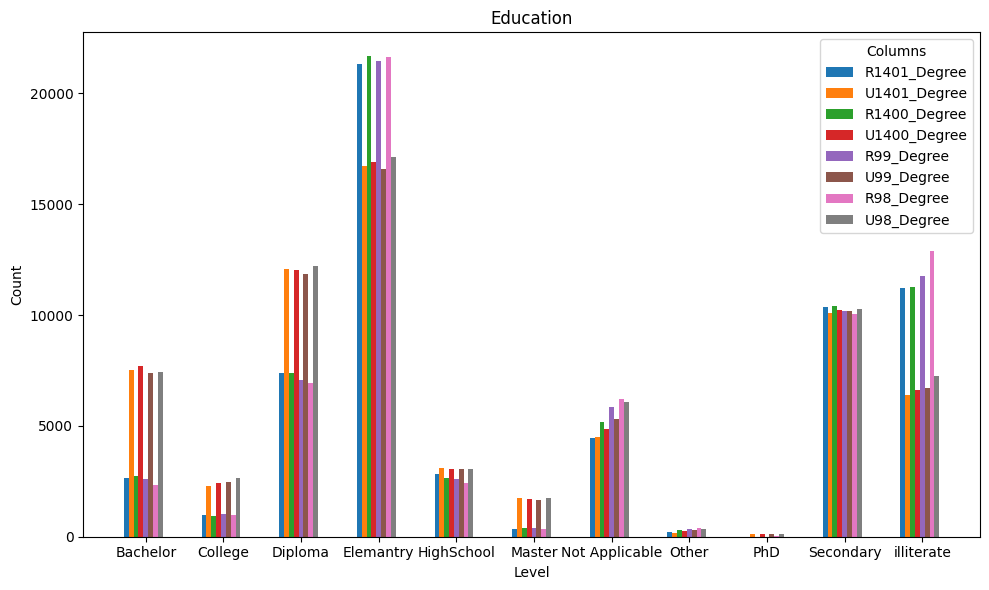

In [331]:
counts = {col: df_deg[col].value_counts().sort_index() for col in df_deg.columns}

df_counts = pd.DataFrame(counts).fillna(0)
plt.figure(figsize=(10, 6))
categories = df_counts.index
num_columns = len(df_counts.columns)
bar_width = 0.5 / num_columns
index = range(len(categories))

for i, column in enumerate(df_counts.columns):
    plt.bar([x + i * bar_width for x in index], df_counts[column], bar_width, label=column)

plt.title('Education')
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks([x + bar_width * (num_columns / 2) for x in index], categories)
plt.legend(title='Columns')
plt.tight_layout()
plt.show()

### Q1_Age

In [332]:
df_age = pd.DataFrame({
    'R1401_age': R1401_social.age,
    'U1401_age': U1401_social.age,
    'R1400_age': R1400_social.age,
    'U1400_age': U1400_social.age,
    'R99_age': R99_social.age,
    'U99_age': U99_social.age,
    'R98_age': R98_social.age,
    'U98_age': U98_social.age
})
df_age.head()

,R1401_age,U1401_age,R1400_age,U1400_age,R99_age,U99_age,R98_age,U98_age
0,37.0,38.0,35.0,28.0,36.0,26.0,50.0,66
1,13.0,35.0,30.0,18.0,29.0,21.0,45.0,61
2,8.0,5.0,4.0,38.0,10.0,2.0,26.0,36
3,3.0,62.0,50.0,31.0,5.0,27.0,25.0,33
4,45.0,60.0,47.0,7.0,72.0,17.0,14.0,12


In [333]:
def map_age_to_interval(age):
    if 0 < age <= 10:
        return 5
    elif 10 < age <= 20:
        return 15
    elif 20 < age <= 30:
        return 25
    elif 30 < age <= 40:
        return 35
    elif 40 < age <= 50:
        return 45
    elif 50 < age <= 60:
        return 55
    elif 60 < age <= 70:
        return 65
    elif 70 < age <= 80:
        return 75
    elif 80 < age <= 100:
        return 90

for column in df_age.columns:
    df_age[f'{column}_Interval'] = df_age[column].map(map_age_to_interval)
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68245 entries, 0 to 68244
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   R1401_age           61743 non-null  float64
 1   U1401_age           64735 non-null  float64
 2   R1400_age           62972 non-null  float64
 3   U1400_age           65942 non-null  float64
 4   R99_age             63289 non-null  float64
 5   U99_age             65666 non-null  float64
 6   R98_age             64296 non-null  float64
 7   U98_age             68245 non-null  int64  
 8   R1401_age_Interval  61257 non-null  float64
 9   U1401_age_Interval  64252 non-null  float64
 10  R1400_age_Interval  62473 non-null  float64
 11  U1400_age_Interval  65464 non-null  float64
 12  R99_age_Interval    62696 non-null  float64
 13  U99_age_Interval    65129 non-null  float64
 14  R98_age_Interval    63544 non-null  float64
 15  U98_age_Interval    67539 non-null  float64
dtypes: f

In [336]:
df_age.columns.values

array(['R1401_age_Interval', 'U1401_age_Interval', 'R1400_age_Interval',
       'U1400_age_Interval', 'R99_age_Interval', 'U99_age_Interval',
       'R98_age_Interval', 'U98_age_Interval'], dtype=object)

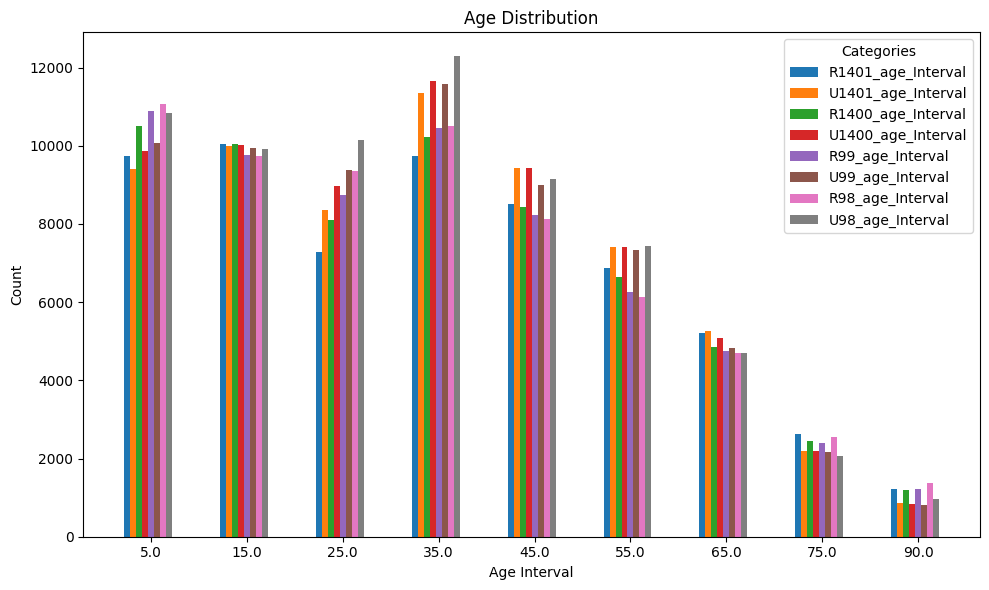

In [342]:
#df_age= df_age.drop(['R1401_age','U1401_age','R1400_age','U1400_age','R99_age','U99_age','R98_age','U98_age'],axis = 1)
counts_age = {col: df_age[col].value_counts().sort_index() for col in df_age.columns}
plt.figure(figsize=(10, 6))

categories = df_counts_age.index
num_columns = len(df_counts_age.columns)
bar_width = 0.5 / num_columns
index = range(len(categories))

for i, column in enumerate(df_counts_age.columns):
    plt.bar(
        [x + i * bar_width for x in index],
        df_counts_age[column],
        bar_width,
        label=column
    )

plt.title('Age Distribution')
plt.xlabel('Age Interval')
plt.ylabel('Count')
plt.xticks([x + bar_width * (num_columns / 2) for x in index], categories)
plt.legend(title="Categories")

plt.tight_layout()
plt.show()

### Q1_Occupationalst

In [343]:
df_occupationalst = pd.DataFrame({
    'R1401_occupationalst': R1401_social.occupationalst,
    'U1401_occupationalst': U1401_social.occupationalst,
    'R1400_occupationalst': R1400_social.occupationalst,
    'U1400_occupationalst': U1400_social.occupationalst,
    'R99_occupationalst': R99_social.occupationalst,
    'U99_occupationalst': U99_social.occupationalst,
    'R98_occupationalst': R98_social.occupationalst,
    'U98_occupationalst': U98_social.occupationalst
})
df_occupationalst.head()

,R1401_occupationalst,U1401_occupationalst,R1400_occupationalst,U1400_occupationalst,R99_occupationalst,U99_occupationalst,R98_occupationalst,U98_occupationalst
0,employed,employed,employed,employed,employed,employed,employed,IncomeWOJob
1,Housewife,Housewife,Housewife,Housewife,Housewife,Housewife,Housewife,IncomeWOJob
2,Student,Not Applicable,Not Applicable,employed,Student,Not Applicable,Housewife,employed
3,Not Applicable,IncomeWOJob,employed,Housewife,Not Applicable,employed,employed,Housewife
4,employed,Housewife,Housewife,Student,Other,Housewife,Student,Student


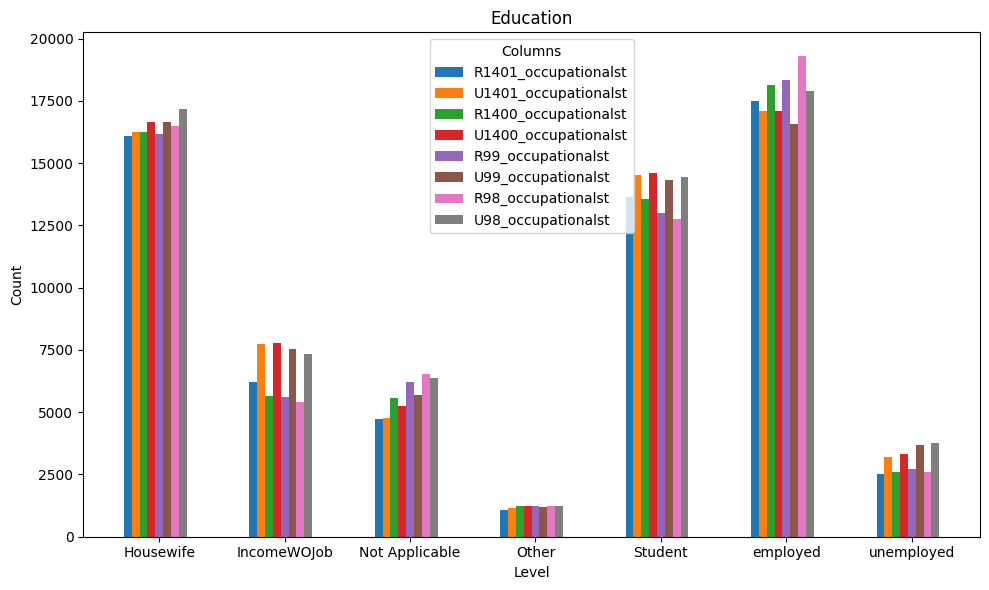

In [345]:
counts_occupationalst = {col: df_occupationalst[col].value_counts().sort_index() for col in df_occupationalst.columns}

df_counts_occupationalst = pd.DataFrame(counts_occupationalst).fillna(0)
plt.figure(figsize=(10, 6))
categories = df_counts_occupationalst.index
num_columns = len(df_counts_occupationalst.columns)
bar_width = 0.5 / num_columns
index = range(len(categories))

for i, column in enumerate(df_counts_occupationalst.columns):
    plt.bar([x + i * bar_width for x in index], df_counts_occupationalst[column], bar_width, label=column)

plt.title('Education')
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks([x + bar_width * (num_columns / 2) for x in index], categories)
plt.legend(title='Columns')
plt.tight_layout()
plt.show()

### Q1_Relation

In [346]:
df_relation = pd.DataFrame({
    'R1401_relation': R1401_social.relation,
    'U1401_relation': U1401_social.relation,
    'R1400_relation': R1400_social.relation,
    'U1400_relation': U1400_social.relation,
    'R99_relation': R99_social.relation,
    'U99_relation': U99_social.relation,
    'R98_relation': R98_social.relation,
    'U98_relation': U98_social.relation
})
df_relation.head()

,R1401_relation,U1401_relation,R1400_relation,U1400_relation,R99_relation,U99_relation,R98_relation,U98_relation
0,Spouse,Head,Head,Head,Head,Head,Head,Head
1,Child,Spouse,Spouse,Spouse,Spouse,Spouse,Spouse,Spouse
2,Child,Child,Child,Head,Child,Child,Child,Head
3,Child,Head,Head,Spouse,Child,Head,Child,Spouse
4,Head,Spouse,Spouse,Child,Head,Spouse,Child,Child


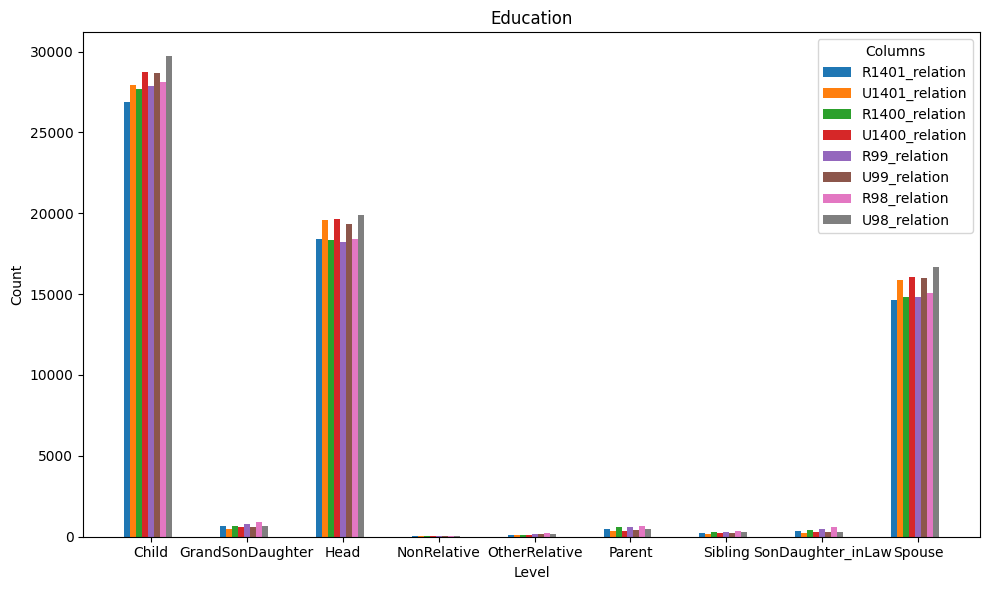

In [347]:
counts_relation = {col: df_relation[col].value_counts().sort_index() for col in df_relation.columns}

df_counts_relation = pd.DataFrame(counts_relation).fillna(0)
plt.figure(figsize=(10, 6))
categories = df_counts_relation.index
num_columns = len(df_counts_relation.columns)
bar_width = 0.5 / num_columns
index = range(len(categories))

for i, column in enumerate(df_counts_relation.columns):
    plt.bar([x + i * bar_width for x in index], df_counts_relation[column], bar_width, label=column)

plt.title('Education')
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks([x + bar_width * (num_columns / 2) for x in index], categories)
plt.legend(title='Columns')
plt.tight_layout()
plt.show()

## Q2

In [226]:
df_bicycle = pd.DataFrame({
    'U98': [U98_housing.bicycle.sum()],
    'R98': [R98_housing.bicycle.sum()],
    'U99': [U99_housing.bicycle.sum()],
    'R99': [R99_housing.bicycle.sum()],
    'U1400': [U1400_housing.bicycle.sum()],
    'R1400': [R1400_housing.bicycle.sum()],
    'U1401': [U1401_housing.bicycle.sum()],
    'R1401': [R1401_housing.bicycle.sum()]})
df_motorcycle = pd.DataFrame({
    'U98': [U98_housing.motorcycle.sum()],
    'R98': [R98_housing.motorcycle.sum()],
    'U99': [U99_housing.motorcycle.sum()],
    'R99': [R99_housing.motorcycle.sum()],
    'U1400': [U1400_housing.motorcycle.sum()],
    'R1400': [R1400_housing.motorcycle.sum()],
    'U1401': [U1401_housing.motorcycle.sum()],
    'R1401': [R1401_housing.motorcycle.sum()]})
df_vehicle = pd.DataFrame({
    'U98': [U98_housing.vehicle.sum()],
    'R98': [R98_housing.vehicle.sum()],
    'U99': [U99_housing.vehicle.sum()],
    'R99': [R99_housing.vehicle.sum()],
    'U1400': [U1400_housing.vehicle.sum()],
    'R1400': [R1400_housing.vehicle.sum()],
    'U1401': [U1401_housing.vehicle.sum()],
    'R1401': [R1401_housing.vehicle.sum()]
})

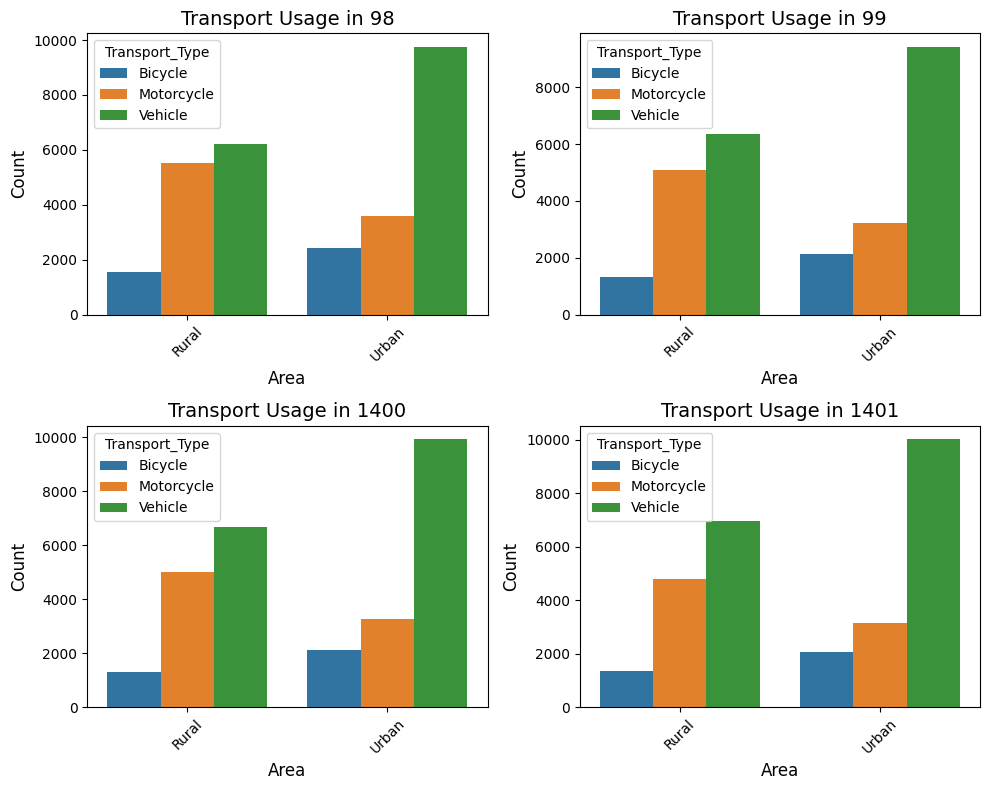

In [227]:
def plot_transport_usage(df_bicycle, df_motorcycle, df_vehicle, year):
    df_combined = pd.concat([df_bicycle, df_motorcycle, df_vehicle], keys=['Bicycle', 'Motorcycle', 'Vehicle'], axis=0)[[f'R{year}', f'U{year}']]
    df_combined = df_combined.reset_index(level=0).rename(columns={'level_0': 'Transport_Type'})
    df_melted = df_combined.melt(id_vars=['Transport_Type'], var_name='Year', value_name='Count')
    return df_melted

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
years = [98, 99, 1400, 1401]

for i, year in enumerate(years):
    ax = axes[i//2, i%2]
    df_melted_year = plot_transport_usage(df_bicycle, df_motorcycle, df_vehicle, year)
    sns.barplot(x='Year', y='Count', hue='Transport_Type', data=df_melted_year, ax=ax)
    ax.set_title(f'Transport Usage in {year}', fontsize=14)
    ax.set_xlabel('Area', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_xticks([0, 1], ['Rural', 'Urban'])
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Q3

In [305]:
# Stacked Bar Char of Retirement_Salary , Rent yearly
#  P4S3 :income_pension, income_rent
df_income_pension = pd.DataFrame({
    'U98': U98_income3.income_pension,
    'R98': R98_income3.income_pension,
    'U99': U99_income3.income_pension,
    'R99': R99_income3.income_pension,
    'U1400': U1400_income3.income_pension,
    'R1400': R1400_income3.income_pension,
    'U1401': U1401_income3.income_pension,
    'R1401': R1401_income3.income_pension
})
df_income_rent = pd.DataFrame({
    'U98': U98_income3.income_rent,
    'R98': R98_income3.income_rent,
    'U99': U99_income3.income_rent,
    'R99': R99_income3.income_rent,
    'U1400': U1400_income3.income_rent,
    'R1400': R1400_income3.income_rent,
    'U1401': U1401_income3.income_rent,
    'R1401': R1401_income3.income_rent
})

In [306]:
df_income_pension_summed = df_income_pension.sum()
df_income_rent_summed = df_income_rent.sum()

df_combined = pd.DataFrame({
    'Pension': df_income_pension_summed,
    'Rent': df_income_rent_summed
})

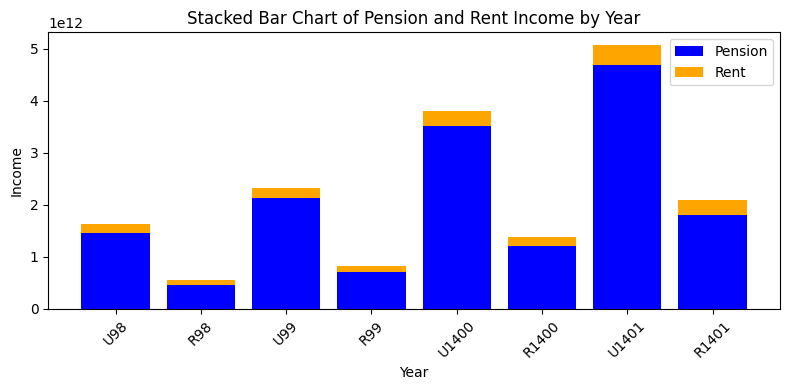

In [230]:
years = ['U98', 'R98', 'U99', 'R99', 'U1400', 'R1400', 'U1401', 'R1401']

plt.figure(figsize=(8, 4))
plt.bar(years, df_combined['Pension'], label='Pension', color='blue')
plt.bar(years, df_combined['Rent'], bottom=df_combined['Pension'], label='Rent', color='orange')

plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Stacked Bar Chart of Pension and Rent Income by Year')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Q4

In [ ]:
R98_restaurant.info()

In [302]:
df_readyFoodU = pd.DataFrame({
    '1401': U1401_restaurant.value,
    '1400': U1400_restaurant.value,
    '99': U99_restaurant.value,
    '98':  U98_restaurant.value
})
df_readyFoodR = pd.DataFrame({
    '1401': R1401_restaurant.value,
    '1400': R1400_restaurant.value,
    '99': R99_restaurant.value,
    '98':  R98_restaurant.value
})

In [303]:
df_ready_foodU_melted = df_readyFoodU.melt(var_name='Year', value_name='Cost', ignore_index=False).reset_index().rename(columns={'index': 'Type'})
df_ready_foodR_melted = df_readyFoodR.melt(var_name='Year', value_name='Cost', ignore_index=False).reset_index().rename(columns={'index': 'Type'})

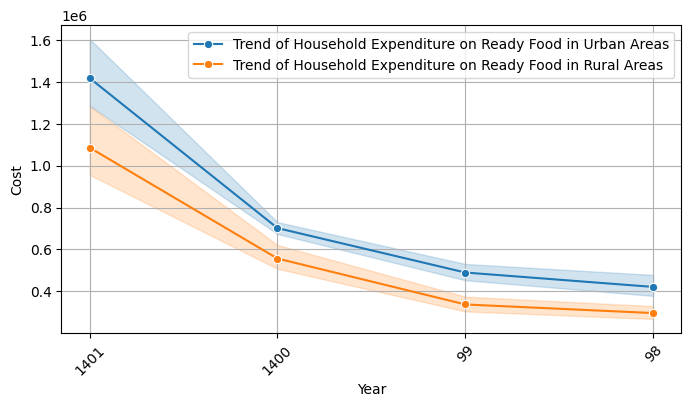

In [304]:
plt.figure(figsize=(8, 4))
sns.lineplot(data=df_ready_foodU_melted, x='Year', y='Cost', marker='o',label= 'Trend of Household Expenditure on Ready Food in Urban Areas')
sns.lineplot(data=df_ready_foodR_melted, x='Year', y='Cost', marker='o', label ='Trend of Household Expenditure on Ready Food in Rural Areas')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Q5

In [ ]:
# P3
# S1 -> خوراکی
# S2 -> نوشیدنی
# S3 -> پوشاک و کفش
# S4 -> هزینه های مسکن
# S6 -> درمانی

In [290]:
df_expenses_R98 = pd.DataFrame({
    'food': R98_food.value ,
    'clothing': R98_clothing.value,
    'housing': R98_housing_costs.value,
    'medical': R98_health.value
})
df_expenses_U98 = pd.DataFrame({
    'food': U98_food.value ,
    'clothing': U98_clothing.value,
    'housing': U98_housing_costs.value,
    'medical': U98_health.value
})
df_expenses_R99 = pd.DataFrame({
    'food': R99_food.value ,
    'clothing': R99_clothing.value,
    'housing': R99_housing_costs.value,
    'medical': R99_health.value
})
df_expenses_U99 = pd.DataFrame({
    'food': U99_food.value ,
    'clothing': U99_clothing.value,
    'housing': U99_housing_costs.value,
    'medical': U99_health.value
})
df_expenses_R1400 = pd.DataFrame({
    'food': R1400_food.value ,
    'clothing': R1400_clothing.value,
    'housing': R1400_housing_costs.value,
    'medical': R1400_health.value
})
df_expenses_U1400 = pd.DataFrame({
    'food': U1400_food.value ,
    'clothing': U1400_clothing.value,
    'housing': U1400_housing_costs.value,
    'medical': U1400_health.value
})
df_expenses_R1401 = pd.DataFrame({
    'food': R1401_food.value ,
    'clothing': R1401_clothing.value,
    'housing': R1401_housing_costs.value,
    'medical': R1401_health.value
})
df_expenses_U1401 = pd.DataFrame({
    'food': U1401_food.value ,
    'clothing': U1401_clothing.value,
    'housing': U1401_housing_costs.value,
    'medical': U1401_health.value
})

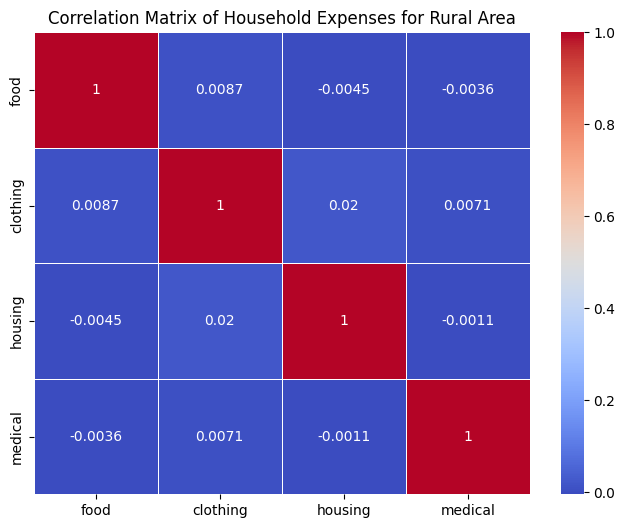

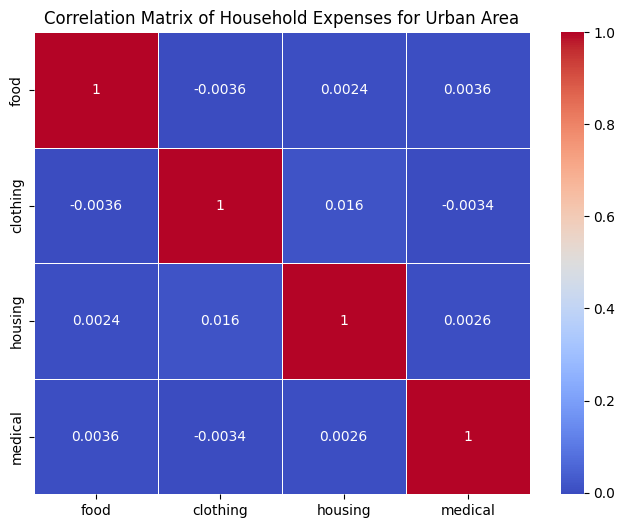

In [291]:
def plot_correlation_matrix(df, year):
    correlation_matrix = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Matrix of Household Expenses for {year}')
    plt.show()
df_expenses_R = df_expenses_R98 + df_expenses_R99 + df_expenses_R1400 + df_expenses_R1401
df_expenses_U = df_expenses_U98 + df_expenses_U99 + df_expenses_U1400 + df_expenses_U1401

plot_correlation_matrix(df_expenses_R, 'Rural Area')
plot_correlation_matrix(df_expenses_U, 'Urban Area')

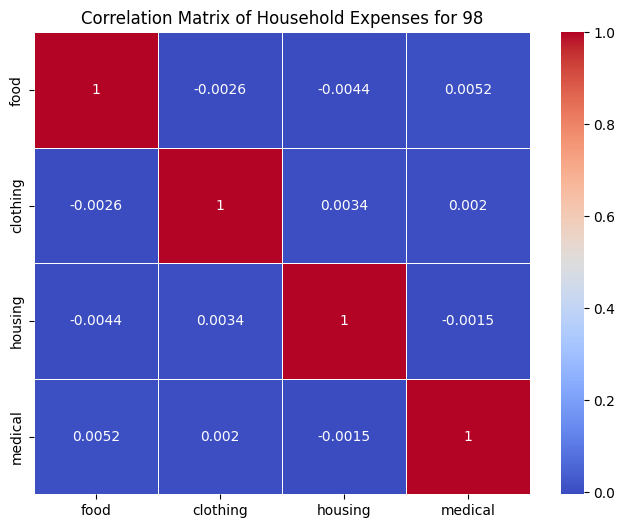

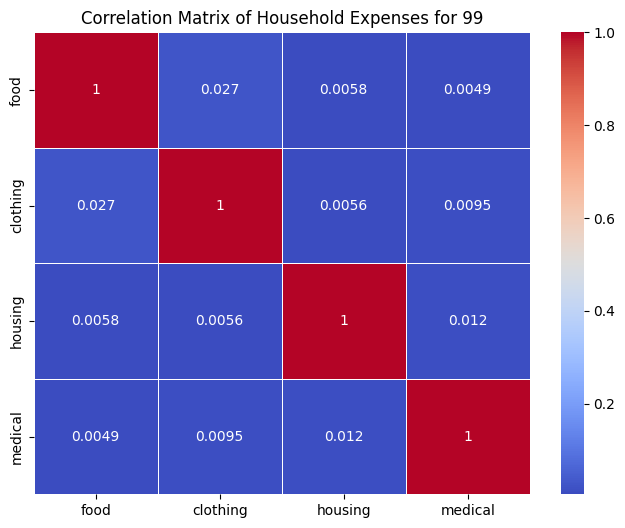

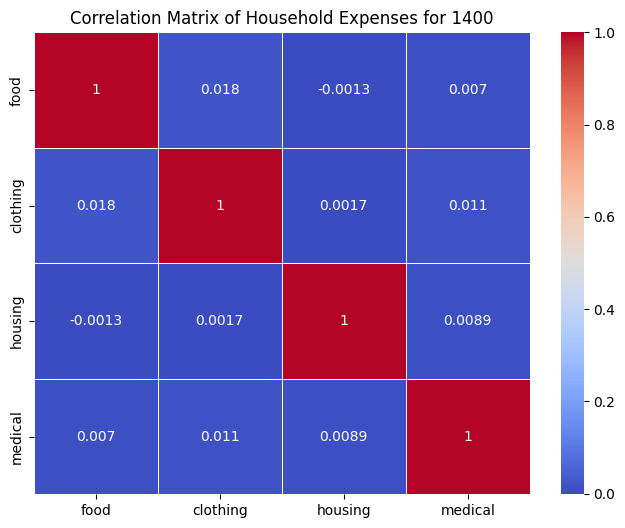

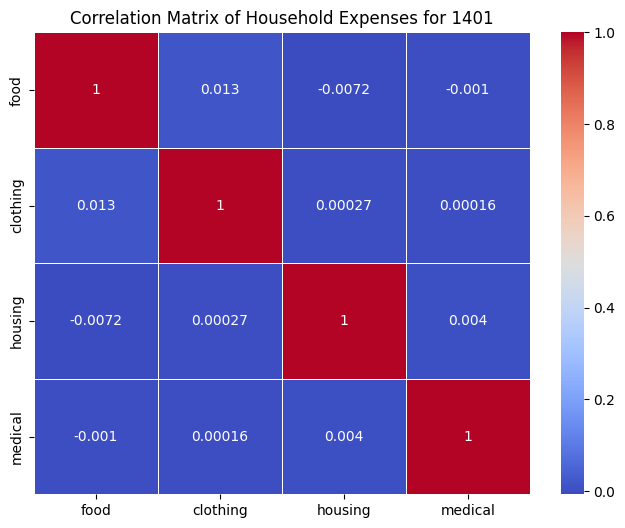

In [292]:
df_expenses_98 = df_expenses_R98 + df_expenses_U98
df_expenses_99 = df_expenses_R99 + df_expenses_U99
df_expenses_1400 = df_expenses_R1400 + df_expenses_U1400
df_expenses_1401 = df_expenses_R1401 + df_expenses_U1401
plot_correlation_matrix(df_expenses_98, '98')
plot_correlation_matrix(df_expenses_99, '99')
plot_correlation_matrix(df_expenses_1400, '1400')
plot_correlation_matrix(df_expenses_1401, '1401')

## Q6

In [92]:
dif =  - 100
ICP_98 = 203.15
ICP_99 = 298.858 #- dif #۲۹۸.۸۵۸
ICP_1400 = 437.042# - dif #۴۳۷.۰۴۲
ICP_1401 = 640.225 #- dif # ۶۴۰.۲۲۵

inflation_98 = (ICP_98- ICP_98)/ ICP_98
inflation_99 = (ICP_99- ICP_98)/ ICP_98
inflation_1400 = (ICP_1400 - ICP_98)/ ICP_98
inflation_1401 = (ICP_1401 - ICP_98) / ICP_98
print('inf in 99, base: 98 ->', inflation_98)
print('inf in 99, base: 98 ->', inflation_99)
print('inf in 1400, base: 98 ->', inflation_1400)
print('inf in 1401, base: 98 ->', inflation_1401)

inf in 99, base: 98 -> 0.0
inf in 99, base: 98 -> 0.4711198621708097
inf in 1400, base: 98 -> 1.1513266059561897
inf in 1401, base: 98 -> 2.151489047501846


In [ ]:
inflation_rates = {
    '98': inflation_98,
    '99': inflation_99,
    '1400': inflation_1400,
    '1401': inflation_1401
}

In [ ]:
R98_income3.columns

Index(['Address', 'member', 'income_pension', 'income_rent', 'income_interest',
       'income_aid', 'income_resale', 'income_transfer', 'Fasl', 'year',
       'DYCOL00', 'other incomes'],
      dtype='object')

In [ ]:
df_R98_income3 = R98_income3['other incomes'] + R98_sub.subsidy
df_R98_income2 = R98_income2.corrected_income
df_R98_income1 = R98_income1.income_w_y
df_U98_income3 = U98_income3['other incomes'] + U98_sub.subsidy
df_U98_income2 = U98_income2.corrected_income
df_U98_income1 = U98_income1.income_w_y

df_R98_netincome = df_R98_income3 + df_R98_income2 + df_R98_income1
df_U98_netincome = df_U98_income3 + df_U98_income2 + df_U98_income1
df_98_netincome = df_R98_netincome + df_U98_netincome

df_R99_income3 = R99_income3['other incomes'] + R99_sub.subsidy
df_R99_income2 = R99_income2.corrected_income
df_R99_income1 = R99_income1.income_w_y
df_U99_income3 = U99_income3['other incomes'] + U99_sub.subsidy
df_U99_income2 = U99_income2.corrected_income
df_U99_income1 = U99_income1.income_w_y

df_R99_netincome = df_R99_income3 + df_R99_income2 + df_R99_income1
df_U99_netincome = df_U99_income3 + df_U99_income2 + df_U99_income1
df_99_netincome = df_R99_netincome + df_U99_netincome

df_R1400_income3 = R1400_income3['other incomes'] + R1400_sub.subsidy
df_R1400_income2 = R1400_income2.corrected_income
df_R1400_income1 = R1400_income1.income_w_y
df_U1400_income3 = U1400_income3['other incomes'] + U1400_sub.subsidy
df_U1400_income2 = U1400_income2.corrected_income
df_U1400_income1 = U1400_income1.income_w_y

df_R1400_netincome = df_R1400_income3 + df_R1400_income2 + df_R1400_income1
df_U1400_netincome = df_U1400_income3 + df_U1400_income2 + df_U1400_income1
df_1400_netincome = df_R1400_netincome + df_U1400_netincome

df_R1401_income3 = R1401_income3['other incomes'] + R1401_sub.subsidy
df_R1401_income2 = R1401_income2.corrected_income
df_R1401_income1 = R1401_income1.income_w_y
df_U1401_income3 = U1401_income3['other incomes'] + R1401_sub.subsidy
df_U1401_income2 = U1401_income2.corrected_income
df_U1401_income1 = U1401_income1.income_w_y

df_R1401_netincome = df_R1401_income3 + df_R1401_income2 + df_R1401_income1
df_U1401_netincome = df_U1401_income3 + df_U1401_income2 + df_U1401_income1
df_1401_netincome = df_R1401_netincome + df_U1401_netincome
# df_R1401_netincome = df_R1401_income3 + pd.to_numeric(df_R1401_income2,errors='coerce') + df_R1401_income1
# df_U1401_netincome = df_U1401_income3 + pd.to_numeric(df_U1401_income2,errors='coerce') + df_U1401_income1

In [ ]:
df_netincome = pd.DataFrame({
    '1401' : df_1401_netincome,
    '1400' : df_1400_netincome,
    '99' : df_99_netincome,
    '98' : df_98_netincome
})

In [ ]:
df_netincome.head()

,1401,1400,99,98
0,1.084782e+10,2.570870e+09,9.706800e+08,1.033975e+09
1,4.560220e+09,1.005810e+09,1.291320e+09,4.085910e+09
2,4.437830e+09,2.035780e+09,8.355100e+08,1.640730e+09
3,2.561020e+09,NaN,1.201790e+09,2.012850e+09
4,6.709820e+09,1.296890e+09,1.603350e+09,1.152720e+09


In [ ]:
df_netincome_melted = df_netincome.melt(var_name='Year', value_name='Income')
df_netincome_melted[df_netincome_melted['Year']=='98']

,Year,Income
96162,98,1.033975e+09
96163,98,4.085910e+09
96164,98,1.640730e+09
96165,98,2.012850e+09
96166,98,1.152720e+09
...,...,...
128211,98,NaN
128212,98,NaN
128213,98,NaN
128214,98,NaN


In [ ]:
df_netincome_melted['real_income'] = df_netincome_melted['Income'].div(1 + df_netincome_melted['Year'].map(inflation_rates))

df_inc_inf = df_netincome_melted[['Year', 'Income', 'real_income']]
df_inc_inf = df_inc_inf.dropna(axis=0)
df_inc_inf

,Year,Income,real_income
0,1401,1.084782e+10,3.442125e+09
1,1401,4.560220e+09,1.447005e+09
2,1401,4.437830e+09,1.408169e+09
3,1401,2.561020e+09,8.126381e+08
4,1401,6.709820e+09,2.129095e+09
...,...,...,...
103469,98,1.978430e+09,1.978430e+09
103470,98,1.013040e+09,1.013040e+09
103471,98,1.614720e+09,1.614720e+09
103472,98,1.082330e+09,1.082330e+09


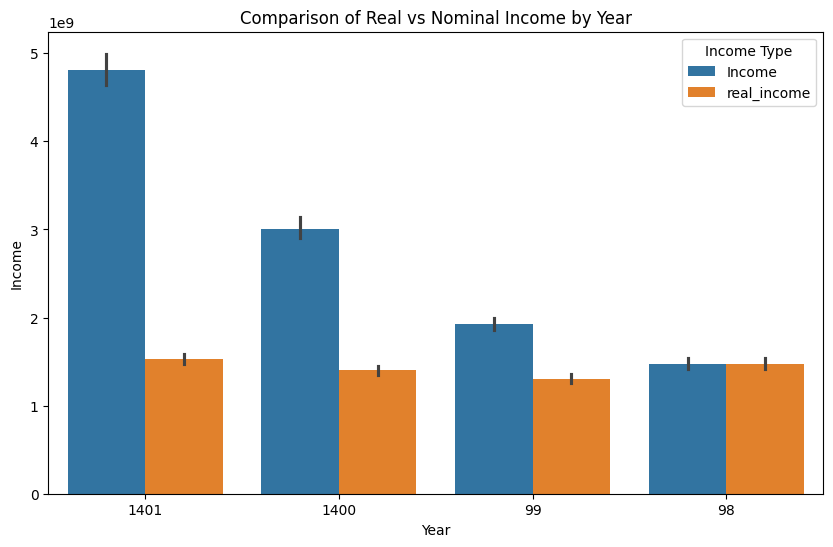

In [ ]:
df_inc_inf_melted = df_inc_inf.melt(id_vars='Year', value_vars=['Income', 'real_income'],var_name='Income Type', value_name='income')

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='income', hue='Income Type', data=df_inc_inf_melted)
plt.title('Comparison of Real vs Nominal Income by Year')
plt.ylabel('Income')
plt.xlabel('Year')
#plt.ylim(0,3e9)
plt.legend(title='Income Type')

plt.show()

# Hypothesis Testing

### 1.rural vs urban CharmahalBakhtiari income


In [ ]:
income_families = []
for df in income_types:
  df['all_income'] = df[['subsidy', 'other incomes', 'corrected_income', 'netincome_w_y']].sum(axis=1)
  df = df.drop(columns=['subsidy', 'other incomes', 'corrected_income', 'netincome_w_y'])
  income_families.append(df)
income_families[0]

,Address,all_income
0,20001383908,713440000.0
1,20001383911,53920000.0
2,20001383915,261170000.0
3,20001383916,258200008.0
4,20001383920,243300000.0
...,...,...
18424,23005707216,210000000.0
18425,23006708808,285000000.0
18426,23006709709,492000000.0
18427,23006709711,465000000.0


In [ ]:
rural = [income_families[0], income_families[1], income_families[2], income_families[3]]
total_income_of_rural_families = pd.concat([df for df in rural], axis = 0)

urban = [income_families[4], income_families[5], income_families[6], income_families[7]]
total_income_of_urban_families = pd.concat([df for df in urban], axis = 0)


rural_data = [R98, R99, R1400, R1401]
urban_data = [U98, U99 , U1400 , U1401]

rural_CharmahalBakhtiari = pd.concat([df[df['province'] == 'CharmahalBakhtiari']['Address'] for df in rural_data], axis = 0)
urban_CharmahalBakhtiari = pd.concat([df[df['province'] == 'CharmahalBakhtiari']['Address'] for df in urban_data], axis = 0)

rural_CharmahalBakhtiari_income = total_income_of_rural_families[total_income_of_rural_families['Address'].isin(rural_CharmahalBakhtiari.values)]
urban_CharmahalBakhtiari_income = total_income_of_urban_families[total_income_of_urban_families['Address'].isin(urban_CharmahalBakhtiari.values)]

In [ ]:
rural_CharmahalBakhtiari_income.to_excel('/content/drive/MyDrive/rural_CharmahalBakhtiari_income.xlsx',index = False)
urban_CharmahalBakhtiari_income.to_excel('/content/drive/MyDrive/urban_CharmahalBakhtiari_income.xlsx',index = False)

NameError: name 'rural_CharmahalBakhtiari_income' is not defined

In [ ]:
rural_CharmahalBakhtiari_income = pd.read_excel('/content/drive/MyDrive/rural_CharmahalBakhtiari_income.xlsx')
urban_CharmahalBakhtiari_income = pd.read_excel('/content/drive/MyDrive/urban_CharmahalBakhtiari_income.xlsx')

In [84]:
def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

rural_CharmahalBakhtiari_income_clean = remove_outliers(rural_CharmahalBakhtiari_income)
urban_CharmahalBakhtiari_income_clean = remove_outliers(urban_CharmahalBakhtiari_income)

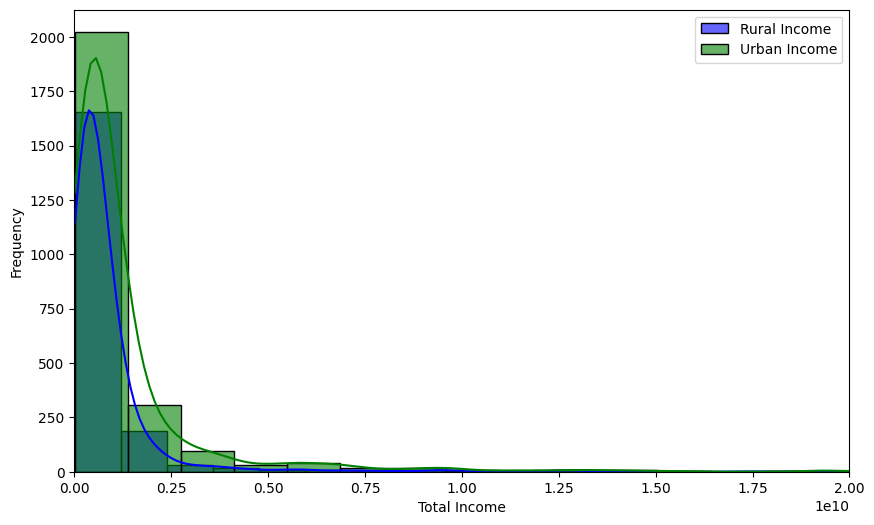

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(rural_CharmahalBakhtiari_income_clean['all_income'], kde=True, color='blue', bins=20,label='Rural Income', alpha=0.6)
sns.histplot(urban_CharmahalBakhtiari_income_clean['all_income'], kde=True, color='green', bins=20,label='Urban Income', alpha=0.6) #70
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.xlim(0,2e10)
plt.legend()
plt.show()


In [86]:
from sklearn.preprocessing import QuantileTransformer
import scipy.stats as stats

rural_income = rural_CharmahalBakhtiari_income['all_income'].dropna().values.reshape(-1, 1)
urban_income = urban_CharmahalBakhtiari_income['all_income'].dropna().values.reshape(-1, 1)

combined_income = pd.concat([pd.Series(rural_income.flatten()), pd.Series(urban_income.flatten())])

scaler = QuantileTransformer(output_distribution='normal')
scaled_combined_income = scaler.fit_transform(combined_income.values.reshape(-1, 1))

scaled_rural_income = pd.Series(scaled_combined_income[:len(rural_income)].flatten())
scaled_urban_income = pd.Series(scaled_combined_income[len(rural_income):].flatten())

shapiro_rural = stats.shapiro(scaled_rural_income)
shapiro_urban = stats.shapiro(scaled_urban_income)
print(f"Shapiro-Wilk test for scaled rural income: p-value = {shapiro_rural.pvalue}")
print(f"Shapiro-Wilk test for scaled urban income: p-value = {shapiro_urban.pvalue}")

t_stat, p_value = stats.ttest_ind(scaled_rural_income, scaled_urban_income, equal_var=True)
print(f"T-test result on scaled data: t-statistic = {t_stat}, p-value = {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between scaled rural and urban incomes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between scaled rural and urban incomes.")


Shapiro-Wilk test for scaled rural income: p-value = 0.18935541638331999
Shapiro-Wilk test for scaled urban income: p-value = 0.0013407840542997446
T-test result on scaled data: t-statistic = -11.273415588204488, p-value = 4.3226130104484697e-29
Reject the null hypothesis: There is a significant difference between scaled rural and urban incomes.


### 2.urban vs rural house value

In [247]:
rural = [R98_housing_costs, R99_housing_costs, R1400_housing_costs, R1401_housing_costs]
urban = [U98_housing_costs, U99_housing_costs , U1400_housing_costs, U1401_housing_costs]

rural_house_value = pd.DataFrame(pd.concat([df['value'] for df in rural], axis = 0), columns = ['value'])
urban_house_value = pd.DataFrame(pd.concat([df['value'] for df in urban], axis = 0), columns = ['value'])

In [248]:
rural_house_value.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275960 entries, 0 to 69888
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   value   275960 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


In [253]:
def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

urban_house_value_clean = remove_outliers(urban_house_value)
rural_house_value_clean = remove_outliers(rural_house_value)

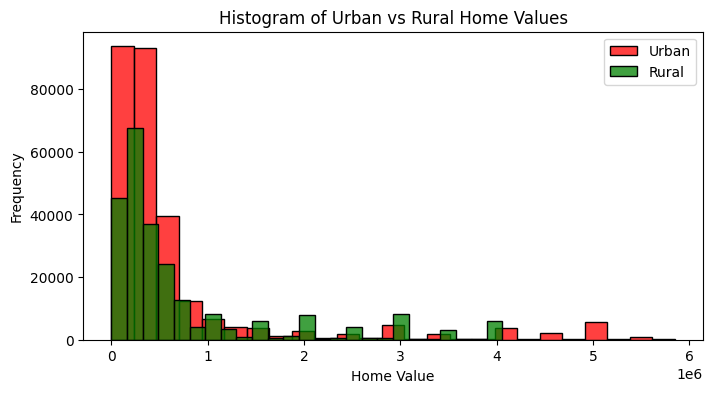

In [273]:
plt.figure(figsize=(8, 4))
sns.histplot(urban_house_value_clean.value, label='Urban', bins=25, color='red')
sns.histplot(rural_house_value_clean.value, label='Rural', bins=25, color='green')

plt.title('Histogram of Urban vs Rural Home Values')
plt.xlabel('Home Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [281]:
scaler = QuantileTransformer(output_distribution='normal', random_state=0)

urban_house_value_clean = urban_house_value_clean.dropna()
rural_house_value_clean = rural_house_value_clean.dropna()

scaled_urban_home_values = pd.Series(
    scaler.fit_transform(urban_house_value_clean[['value']]).flatten(),
    index=urban_house_value_clean.index
)

scaled_rural_home_values = pd.Series(
    scaler.fit_transform(rural_house_value_clean[['value']]).flatten(),
    index=rural_house_value_clean.index
)

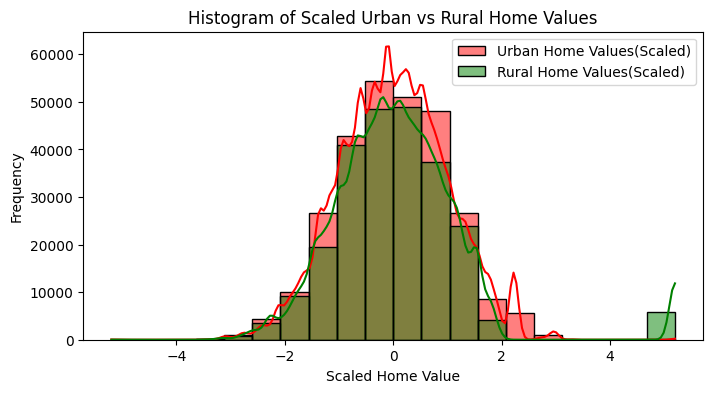

In [283]:
plt.figure(figsize=(8, 4))

sns.histplot(scaled_urban_home_values, label='Urban Home Values(Scaled)', kde=True, bins=20, alpha=0.5,color='red')
sns.histplot(scaled_rural_home_values, label='Rural Home Values(Scaled)', kde=True, bins=20, alpha=0.5,color = 'green')

plt.title('Histogram of Scaled Urban vs Rural Home Values')
plt.xlabel('Scaled Home Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [284]:
t_stat, p_value = stats.ttest_ind(scaled_urban_home_values, scaled_rural_home_values)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a significance difference between values of houses in rural and urban regions")
else :
    print("There is no significance difference between values of houses in rural and urban regions")

T-statistic: -19.674675007687423
P-value: 3.8197707575158655e-86
There is a significance difference between values of houses in rural and urban regions


### 3.degree holders vs non degree holders income


In [ ]:
#calculating individual income

income1 = [R98_income1, R99_income1, R1400_income1, R1401_income1, U98_income1, U99_income1, U1400_income1, U1401_income1]
income_1 = pd.concat([df[['Address', 'member', 'year', 'netincome_w_y']] for df in income1], axis=0)

income2 = [R98_income2, R99_income2, R1400_income2, R1401_income2, U98_income2, U99_income2, U1400_income2, U1401_income2]
income_2 = pd.concat([df[['Address', 'member', 'year', 'income_s_y']] for df in income2], axis=0)

income3 = [R98_income3, R99_income3, R1400_income3, R1401_income3, U98_income3, U99_income3, U1400_income3, U1401_income3]
income_3 = pd.concat([df[['Address', 'member', 'year', 'other incomes']] for df in income3], axis=0)

individual_income = pd.merge(income_1, income_2, on = ['Address', 'member', 'year'], how = 'outer')
individual_income = pd.merge(individual_income, income_3, on = ['Address', 'member', 'year'], how = 'outer')

individual_income = total_personal_income.fillna(0)

In [ ]:
individual_income['total'] = individual_income['netincome_w_y'] + individual_income['income_s_y'] + individual_income['other incomes']
individual_income = individual_income.drop(columns = ['netincome_w_y', 'income_s_y', 'other incomes'])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(individual_income['total'])
plt.show()

In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(individual_income['total']))

individual_income = individual_income[z_scores < 3]

In [ ]:
s = [R98_social, R99_social, R1400_social, R1401_social, U98_social, U99_social , U1400_social , U1401_social]
degree_information = pd.concat([df[['Address', 'member', 'degree', 'year']] for df in s], axis=0)

In [ ]:
individual_income_degree = pd.merge(individual_income, degree_information, on = ['Address', 'member', 'year'], how = 'inner')
individual_income_degree.degree.unique()

In [ ]:
Uni = ['Bachelor', 'Master', 'PhD']

individual_income_uni_edu = individual_income_degree[individual_income_degree['degree'].isin(Uni)]['total']
individual_income_no_uni_edu = individual_income_degree[~individual_income_degree['degree'].isin(Uni)]['total']

In [ ]:
individual_income_uni_edu.hist(bins = 50)

In [ ]:
individual_income_no_uni_edu.hist(bins = 50)

In [ ]:
#Data is not normally distributed

_,pvalue = stats.mannwhitneyu(individual_income_no_uni_edu,individual_income_uni_edu, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject the null hypothesis: There is a significant difference between degree holders and non degree holders incomes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between degree holders and non degree holders incomes.")

### 4. 1400 vs 1401 Urban Income

In [285]:
# [R98_income2, R99_income2, R1400_income2, R1401_income2, U98_income2, U99_income2, U1400_income2, U1401_income2]:
urban_income_1400 = income_types[6].drop(columns=['Address']).sum(axis=1)
urban_income_1401 = income_types[7].drop(columns=['Address']).sum(axis=1)

In [286]:
urban_income_1401 = urban_income_1401 * inflation_1401
urban_income_1400 = urban_income_1400 * inflation_1400

In [287]:
def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

urban_income_1400_clean = remove_outliers(urban_income_1400)
urban_income_1401_clean = remove_outliers(urban_income_1401)

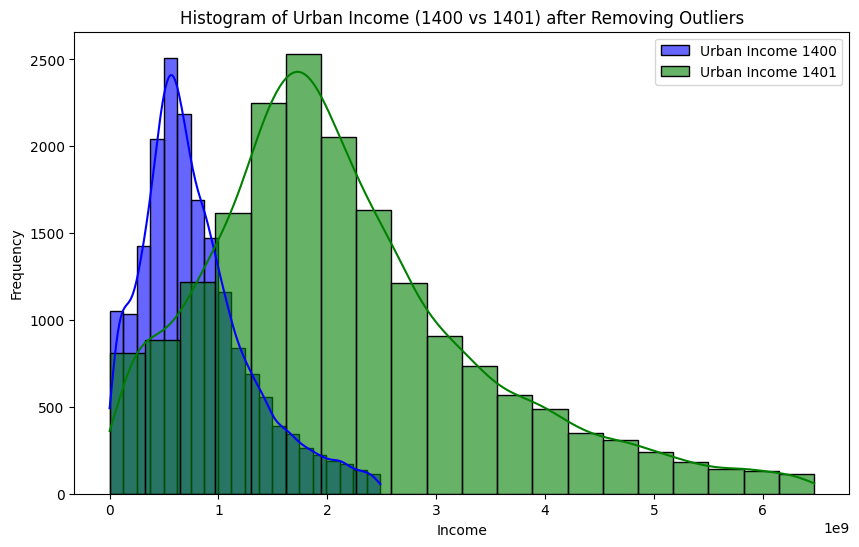

In [288]:
plt.figure(figsize=(10, 6))
sns.histplot(urban_income_1400_clean, color='blue', label='Urban Income 1400', kde=True, bins=20, alpha=0.6)
sns.histplot(urban_income_1401_clean, color='green', label='Urban Income 1401', kde=True, bins=20, alpha=0.6)
plt.title('Histogram of Urban Income (1400 vs 1401) after Removing Outliers')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [289]:
t_stat, p_value = stats.ttest_ind(urban_income_1401_clean, urban_income_1400_clean)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis, average of income in 1401 is significantly different from 1400.")
else:
    print("Accept the null hypothesis, average of income in 1401 is not significantly different from 1400.")

T-statistic: 136.1590546419533
P-value: 0.0
Reject the null hypothesis, average of income in 1401 is significantly different from 1400.


#### Preparing 1400

In [128]:
# 1400 cost
clothing_combined1400_df = U1400_clothing[['Address','value']]
clothing_combined1400_df.rename(columns={'value': 'clothing_value'}, inplace=True)

health_combined1400_df = U1400_health[['Address','value']]
health_combined1400_df.rename(columns={'value': 'health_value'}, inplace=True)

drink_combined1400_df = U1400_drink[['Address','value']]
drink_combined1400_df.rename(columns={'value': 'drink_value'}, inplace=True)

housing_costs_combined1400_df = U1400_housing_costs[['Address','value']]
housing_costs_combined1400_df.rename(columns={'value': 'housing_costs_value'}, inplace=True)

investments_combined1400_df = U1400_investments[['Address','value']]
investments_combined1400_df.rename(columns={'value': 'investment_value'}, inplace=True)

restaurant_combined1400_df = U1400_restaurant[['Address','value']]
restaurant_combined1400_df.rename(columns={'value': 'restaurant_value'}, inplace=True)

food_combined1400_df = U1400_food[['Address','value']]
food_combined1400_df.rename(columns={'value': 'food_value'}, inplace=True)

U1400_other['value_i'] = pd.to_numeric(U1400_other['value'], errors='coerce').fillna(0).astype(int)
other_combined1400_df = U1400_other[['Address','value_i']]
other_combined1400_df.rename(columns={'value': 'others'}, inplace=True)

remained_combined1400_df = df_1400_remaining_cost[['1400_Address','1400_value']]
remained_combined1400_df.rename(columns={'1400_value': 'remained_value'}, inplace=True)
remained_combined1400_df.rename(columns={'1400_Address': 'Address'}, inplace=True)

<ipython-input-128-fd0acb46f78d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clothing_combined1400_df.rename(columns={'value': 'clothing_value'}, inplace=True)
<ipython-input-128-fd0acb46f78d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_combined1400_df.rename(columns={'value': 'health_value'}, inplace=True)
<ipython-input-128-fd0acb46f78d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drink_combined1400_df.rename(co

In [129]:
food_combined1400_df_grouped = food_combined1400_df.groupby('Address', as_index=False)['food_value'].sum()
drink_combined1400_df_grouped = drink_combined1400_df.groupby('Address', as_index=False)['drink_value'].sum()
clothing_combined1400_df_grouped = clothing_combined1400_df.groupby('Address', as_index=False)['clothing_value'].sum()
health_combined1400_df_grouped = health_combined1400_df.groupby('Address', as_index=False)['health_value'].sum()
housing_costs_combined1400_df_grouped = housing_costs_combined1400_df.groupby('Address', as_index=False)['housing_costs_value'].sum()
investments_combined1400_df_grouped = investments_combined1400_df.groupby('Address', as_index=False)['investment_value'].sum()
restaurant_combined1400_df_grouped = restaurant_combined1400_df.groupby('Address', as_index=False)['restaurant_value'].sum()
other_combined1400_df_grouped = other_combined1400_df.groupby('Address', as_index=False)['value_i'].sum()
remained_combined1400_df_grouped = remained_combined1400_df.groupby('Address', as_index=False)['remained_value'].sum()

In [130]:
df_allcost_1400 = pd.merge(food_combined1400_df_grouped, other_combined1400_df_grouped, on='Address', how='outer') #38196, 38172
df_allcost_1400 = df_allcost_1400.merge(housing_costs_combined1400_df_grouped, on='Address', how='outer') # 38328
df_allcost_1400 = df_allcost_1400.merge(remained_combined1400_df_grouped, on='Address', how='outer') # 38104
df_allcost_1400 = df_allcost_1400.merge(drink_combined1400_df_grouped, on='Address', how='outer')
df_allcost_1400 = df_allcost_1400.merge(restaurant_combined1400_df_grouped, on='Address', how='outer')
df_allcost_1400 = df_allcost_1400.merge(clothing_combined1400_df_grouped, on='Address', how='outer')
df_allcost_1400 = df_allcost_1400.merge(investments_combined1400_df_grouped, on='Address', how='outer')
df_allcost_1400 = df_allcost_1400.merge(health_combined1400_df_grouped, on='Address', how='outer')

In [131]:
df_allcost_1400_cleaned = df_allcost_1400.dropna(thresh=df_allcost_1400.shape[1] - 4)

dahak_cost = df_allcost_1400_cleaned.groupby('Address')[['remained_value','food_value', 'value_i', 'housing_costs_value']].sum()
dahak_cost['total'] = dahak_cost['food_value']+dahak_cost['value_i']+dahak_cost['housing_costs_value']
quartiles = dahak_cost['total'].quantile(np.arange(0.1, 1, 0.1))

def rank_by_quartile(value):
  if value <= quartiles.values[0]:
    return 1
  elif value <= quartiles.values[1]:
      return 2
  elif value <= quartiles.values[2]:
      return 3
  elif value <= quartiles.values[3]:
      return 4
  elif value <= quartiles.values[4]:
      return 5
  elif value <= quartiles.values[5]:
      return 6
  elif value <= quartiles.values[6]:
      return 7
  elif value <= quartiles.values[7]:
      return 8
  elif value <= quartiles.values[8]:
      return 9
  else:
      return 10

dahak_cost['rank'] =  dahak_cost['total'].apply(rank_by_quartile)
df_allcost_1400_cleaned = df_allcost_1400_cleaned.merge(dahak_cost[['rank']], left_on='Address', right_index=True, how='left')

In [134]:
def fill_na_with_rank_mode(df):
    for col in df.columns:
        if df[col].isna().sum() > 0:
            mode_per_rank = df.groupby('rank')[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
            df[col] = df.apply(lambda row: row[col] if pd.notna(row[col])
                               else mode_per_rank[row['rank']], axis=1)
    return df

df_allcost_1400U_cleaned_final = fill_na_with_rank_mode(df_allcost_1400_cleaned)

In [150]:
df_allcost_1400U_final['food_value'] = df_allcost_1400U_final['food_value']*12
df_allcost_1400U_final['remained_value'] = df_allcost_1400U_final['remained_value']*12
df_allcost_1400U_final['housing_costs_value'] = df_allcost_1400U_final['housing_costs_value']*12
df_allcost_1400U_final['drink_value'] = df_allcost_1400U_final['drink_value']*12
df_allcost_1400U_final['restaurant_value'] = df_allcost_1400U_final['restaurant_value']*12
df_allcost_1400U_final['clothing_value'] = df_allcost_1400U_final['clothing_value'] *12
df_allcost_1400U_final['health_value']= df_allcost_1400U_final['health_value'] * 12 # cost monthly bud except for other_cost and investment

df_allcost_1400U = df_allcost_1400U_final.drop(columns=['Address']).sum(axis=1)
df_allcost_1400U = pd.DataFrame({'Address': df_allcost_1400['Address'], 'Cost_Sum': df_allcost_1400U})
df_allcost_1400U.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37829 entries, 0 to 37828
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Address   37829 non-null  object 
 1   Cost_Sum  17233 non-null  float64
dtypes: float64(1), object(1)
memory usage: 591.2+ KB


In [172]:
df_allcost_1400U.head()

,Address,Cost_Sum
0,10001000119,9.221530e+08
1,10001000120,1.815870e+09
2,10001000126,5.465520e+08
3,10001000130,1.431738e+09
4,10001000132,1.286139e+09


In [173]:
df_allcost_1400U.to_excel('/content/drive/MyDrive/df_allcost_1400U.xlsx', index=False)

#### life quality

In [195]:
# life level -> health , job, costs
# 1401 costs
df_allcost_1400U = pd.read_excel('/content/drive/MyDrive/df_allcost_1400U.xlsx')
df_allcost_1401U = pd.read_excel('/content/drive/MyDrive/df_allcost_1401_cleaned.xlsx')

In [196]:
df_allcost_1401U = df_allcost_1401U[~df_allcost_1401U['Address'].isin(R1401_food['Address'])]
df_allcost_1401U = df_allcost_1401U[~df_allcost_1401U['Address'].isin(R1401_other['Address'])]
df_allcost_1401U = df_allcost_1401U[~df_allcost_1401U['Address'].isin(R1401_investments['Address'])]

In [197]:
df_allcost_1401U['food_value'] = df_allcost_1401U['food_value']*12
df_allcost_1401U['remained_value'] = df_allcost_1401U['remained_value']*12
df_allcost_1401U['housing_costs_value'] = df_allcost_1401U['housing_costs_value']*12
df_allcost_1401U['drink_value'] = df_allcost_1401U['drink_value']*12
df_allcost_1401U['restaurant_value'] = df_allcost_1401U['restaurant_value']*12
df_allcost_1401U['clothing_value'] = df_allcost_1401U['clothing_value'] *12
df_allcost_1401U['health_value']= df_allcost_1401U['health_value'] * 12

In [198]:
df_allcost_1401UX= df_allcost_1401U.drop(columns=['Address']).sum(axis=1)
df_allcost_1401U = pd.DataFrame({'Address': df_allcost_1401U['Address'], 'Cost_Sum': df_allcost_1401UX})

In [199]:
def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

df_allcost_1400U = df_allcost_1400U.dropna()
df_allcost_1401U = df_allcost_1401U.dropna()

df_allcost_1400U_clean = remove_outliers(df_allcost_1400U.Cost_Sum)
df_allcost_1401U_clean = remove_outliers(df_allcost_1401U.Cost_Sum)

Text(0, 0.5, 'Frequency')

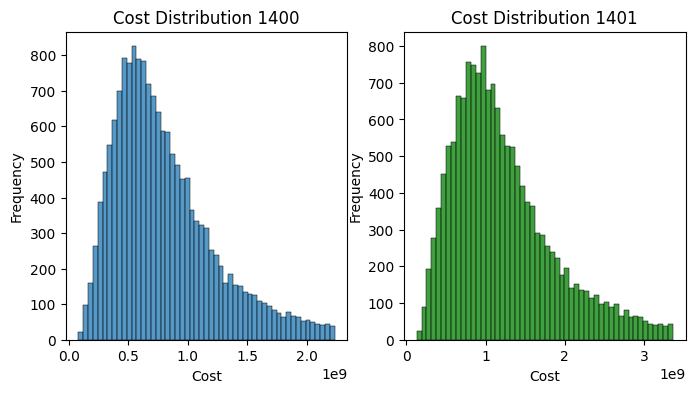

In [200]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_allcost_1400U_clean, label='1400 Costs')
plt.title('Cost Distribution 1400')
plt.xlabel('Cost')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_allcost_1401U_clean, color='green', label='1401 Costs')
plt.title('Cost Distribution 1401')
plt.xlabel('Cost')
plt.ylabel('Frequency')

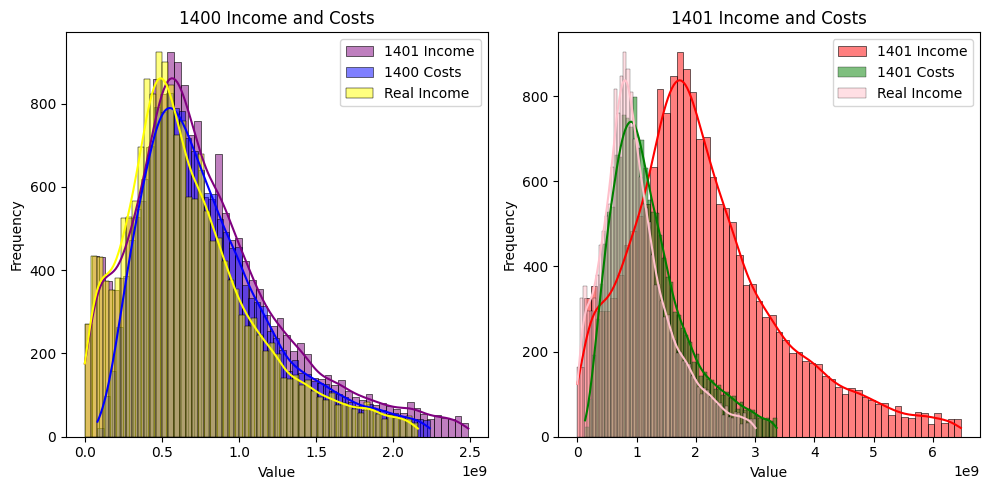

In [205]:
plt.figure(figsize=(10, 5))

urban_income_1400_clean_noInf = urban_income_1400_clean / inflation_1400
urban_income_1401_clean_noInf = urban_income_1401_clean / inflation_1401

plt.subplot(1, 2, 1)
sns.histplot(urban_income_1400_clean, kde=True, color='purple', label='1401 Income')
sns.histplot(df_allcost_1400U_clean, kde=True, color='blue', label='1400 Costs')
sns.histplot(urban_income_1400_clean_noInf, kde=True, color='yellow', label='Real Income')

plt.title('1400 Income and Costs')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(urban_income_1401_clean, kde=True, color='red', label='1401 Income')
sns.histplot(df_allcost_1401U_clean, kde=True, color='green', label='1401 Costs')
sns.histplot(urban_income_1401_clean_noInf, kde=True, color='pink', label='Real Income')

plt.title('1401 Income and Costs')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [210]:
# TO DO : average
inc_avg_noInf_1401 = urban_income_1401_clean_noInf.mean()
inc_avg_1401 = urban_income_1401_clean.mean()
cost_avg_1401 = df_allcost_1401U_clean.mean()

inc_avg_noInf_1400 = urban_income_1400_clean_noInf.mean()
inc_avg_1400 = urban_income_1400_clean.mean()
cost_avg_1400 = df_allcost_1400U_clean.mean()

print(f"the difference between real income in these years:{inc_avg_noInf_1401} - {inc_avg_noInf_1400} = {inc_avg_noInf_1401 - inc_avg_noInf_1400} ")
print(f"the difference between income with inflation in these years:{inc_avg_1401} - {inc_avg_1400} = {inc_avg_1401 - inc_avg_noInf_1400}")
print(f"the difference between families costs in these years:{cost_avg_1401} - {cost_avg_1400} = {cost_avg_1401 - cost_avg_1400} ")

the difference between real income in these years:1002756861.6742862 - 684136510.5035439 = 318620351.1707424 
the difference between income with inflation in these years:2157420405.19955 - 787664566.6487561 = 1473283894.6960063
the difference between families costs in these years:1223051971.5815108 - 802551716.8098727 = 420500254.77163804 


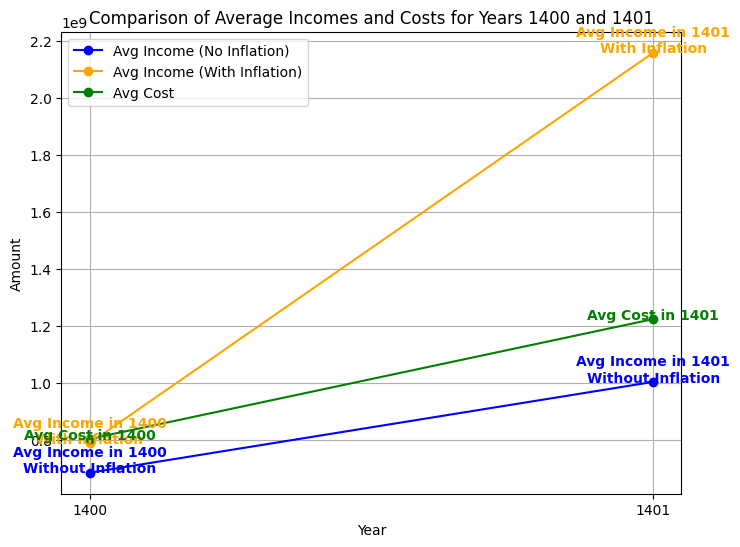

In [224]:
plt.figure(figsize=(8, 6))

# Plotting the average incomes and costs for both years
plt.plot([1400, 1401], [inc_avg_noInf_1400, inc_avg_noInf_1401], marker='o', label='Avg Income (No Inflation)', color='blue')
plt.plot([1400, 1401], [inc_avg_1400, inc_avg_1401], marker='o', label='Avg Income (With Inflation)', color='orange')
plt.plot([1400, 1401], [cost_avg_1400, cost_avg_1401], marker='o', label='Avg Cost', color='green')

plt.text(1400, inc_avg_noInf_1400 + 20, 'Avg Income in 1400\nWithout Inflation', fontsize=10, weight='bold', color='blue', ha='center')
plt.text(1401, inc_avg_noInf_1401 + 20, 'Avg Income in 1401\nWithout Inflation', fontsize=10, weight='bold', color='blue', ha='center')
plt.text(1400, inc_avg_1400 + 20, 'Avg Income in 1400\nWith Inflation', fontsize=10, weight='bold', color='orange', ha='center')
plt.text(1401, inc_avg_1401 + 20, 'Avg Income in 1401\nWith Inflation', fontsize=10, weight='bold', color='orange', ha='center')
plt.text(1400, cost_avg_1400 + 20, 'Avg Cost in 1400', fontsize=10, weight='bold', color='green', ha='center')
plt.text(1401, cost_avg_1401 + 20, 'Avg Cost in 1401', fontsize=10, weight='bold', color='green', ha='center')

plt.title('Comparison of Average Incomes and Costs for Years 1400 and 1401')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.xticks([1400, 1401])
plt.legend()
plt.grid(True)

plt.show()

<div dir="rtl">

### تحلیل سطح زندگی خانوارها در سال ۱۴۰۰ و ۱۴۰۱

همانطور که در نمودار مشاهده می‌شود، میانگین درآمد خانوارها افزایش داشته و حتی بعد از تأثیر تورم نیز در درآمد افزایش مشاهده می‌شود. اما همانطور که پیداست، میانگین هزینه‌های خانوار نیز افزایش یافته، حتی با شیب بیشتر. این نمی‌تواند نتیجه این بدهد که مردم سطح زندگی بهتری را در سال ۱۴۰۱ تجربه کرده‌اند.

شاخص‌های کیفیت زندگی تنها درآمد و هزینه‌های خانوارها نیست و به عواملی مانند نرخ بیکاری، طلاق، سیاست‌گذاری‌های دولتی، نرخ ثبات سیاسی و امنیت، آزادی‌های مدنی و برابری زن و مرد نیز بستگی دارد. تنها با مقایسه این دو فاکتور (درآمد و هزینه) نمی‌توان به چنین نتیجه‌ای رسید.

### عوامل کلیدی تاثیرگذار بر سطح زندگی

**نرخ بیکاری:** بیکاری می‌تواند به شدت بر کیفیت زندگی تأثیر بگذارد. حتی اگر درآمد میانگین افزایش یابد، بیکاری بالاتر می‌تواند سطح کلی رفاه را کاهش دهد.

**شاخص‌های بهداشتی و درمانی:** دسترسی به خدمات درمانی، کیفیت مراقبت‌های پزشکی و سلامت عمومی از عوامل مهمی در تعیین سطح زندگی هستند.

**آزادی‌های مدنی و سیاسی:** میزان دسترسی به آزادی‌های اجتماعی، حقوق بشر و ثبات سیاسی نیز می‌توانند بر رضایت عمومی و کیفیت زندگی تأثیرگذار باشند.

**نابرابری جنسیتی و عدالت اجتماعی:** میزان برابری جنسیتی و فرصت‌های برابر برای همه افراد در جامعه نیز از شاخص‌های مهمی است که بر بهبود سطح زندگی تأثیر دارد.

بنابراین، برای تحلیل دقیق‌تر سطح زندگی خانوارها، باید طیف وسیعی از شاخص‌های اجتماعی و اقتصادی را در نظر گرفت، نه فقط درآمد و هزینه‌های آن‌ها.

</div>

# **Part 3: Machine Learning**

#clustering

### Preparing X 98

In [ ]:
# expenses => Part 3 : Section 1- 14 => food + clothing + health + drink + housing_costs + invest + othercost + restaurant
# R98_food *
# R98_clothing *
# R98_health *
# R98_drink *
# R98_housing_costs *
# df_98_remaining_cost
# R98_restaurant *
# R98_other *
# R98_investments *

In [ ]:
clothing_combined98_df =  pd.concat([U98_clothing, R98_clothing], axis=0, ignore_index=True)
clothing_combined98_df = clothing_combined98_df[['Address','value']]
clothing_combined98_df.rename(columns={'value': 'clothing_value'}, inplace=True)

In [ ]:
health_combined98_df =  pd.concat([U98_health, R98_health], axis=0, ignore_index=True)
health_combined98_df = health_combined98_df[['Address','value']]
health_combined98_df.rename(columns={'value': 'health_value'}, inplace=True)

In [ ]:
drink_combined98_df =  pd.concat([U98_drink, R98_drink], axis=0, ignore_index=True)
drink_combined98_df = drink_combined98_df[['Address','value']]
drink_combined98_df.rename(columns={'value': 'drink_value'}, inplace=True)

In [ ]:
housing_costs_combined98_df =  pd.concat([U98_housing_costs, R98_housing_costs], axis=0, ignore_index=True)
housing_costs_combined98_df = housing_costs_combined98_df[['Address','value']]
housing_costs_combined98_df.rename(columns={'value': 'housing_costs_value'}, inplace=True)

In [ ]:
investments_combined98_df =  pd.concat([U98_investments, R98_investments], axis=0, ignore_index=True)
investments_combined98_df = investments_combined98_df[['Address','value']]
investments_combined98_df.rename(columns={'value': 'investment_value'}, inplace=True)

In [98]:
restaurant_combined98_df =  pd.concat([U98_restaurant, R98_restaurant], axis=0, ignore_index=True)
restaurant_combined98_df = restaurant_combined98_df[['Address','value']]
restaurant_combined98_df.rename(columns={'value': 'restaurant_value'}, inplace=True)

NameError: name 'U98_restaurant' is not defined

In [99]:
food_combined98_df =  pd.concat([U98_food, R98_food], axis=0, ignore_index=True)
food_combined98_df = food_combined98_df[['Address','value']]
food_combined98_df.rename(columns={'value': 'food_value'}, inplace=True)

NameError: name 'U98_food' is not defined

In [ ]:
U98_other['value_i'] = pd.to_numeric(U98_other['value'], errors='coerce').fillna(0).astype(int)
R98_other['value_i'] = pd.to_numeric(R98_other['value'], errors='coerce').fillna(0).astype(int)

In [ ]:
print (U98_other['value_i'][20] , U98_other['value'][20])

In [ ]:
other_combined98_df =  pd.concat([U98_other, R98_other], axis=0, ignore_index=True)
other_combined98_df = other_combined98_df[['Address','value_i']]
other_combined98_df.rename(columns={'value': 'others'}, inplace=True)
other_combined98_df.head()

In [ ]:
remained_combined98_df = df_98_remaining_cost[['98_Address','98_value']]#[['Address','remained_value']]
remained_combined98_df.rename(columns={'98_value': 'remained_value'}, inplace=True)
remained_combined98_df.rename(columns={'98_Address': 'Address'}, inplace=True)
remained_combined98_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38104 entries, 0 to 38103
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Address         38104 non-null  object
 1   remained_value  38104 non-null  object
dtypes: object(2)
memory usage: 595.5+ KB


In [ ]:
# sum food value of the same address
food_combined98_df_grouped = food_combined98_df.groupby('Address', as_index=False)['food_value'].sum()
food_combined98_df_grouped.info()

In [ ]:
# sum drink value of the same address
drink_combined98_df_grouped = drink_combined98_df.groupby('Address', as_index=False)['drink_value'].sum()
drink_combined98_df_grouped.info()

In [ ]:
clothing_combined98_df_grouped = clothing_combined98_df.groupby('Address', as_index=False)['clothing_value'].sum()
clothing_combined98_df_grouped.info()

In [ ]:
# sum health
health_combined98_df_grouped = health_combined98_df.groupby('Address', as_index=False)['health_value'].sum()
health_combined98_df_grouped.info()

In [ ]:
housing_costs_combined98_df_grouped = housing_costs_combined98_df.groupby('Address', as_index=False)['housing_costs_value'].sum()
housing_costs_combined98_df_grouped.info()

In [ ]:
investments_combined98_df_grouped = investments_combined98_df.groupby('Address', as_index=False)['investment_value'].sum()
investments_combined98_df_grouped.info()

In [ ]:
restaurant_combined98_df_grouped = restaurant_combined98_df.groupby('Address', as_index=False)['restaurant_value'].sum()
restaurant_combined98_df_grouped.info()

In [ ]:
other_combined98_df_grouped = other_combined98_df.groupby('Address', as_index=False)['value_i'].sum()
other_combined98_df_grouped.head()

In [ ]:
remained_combined98_df_grouped = remained_combined98_df.groupby('Address', as_index=False)['remained_value'].sum()
remained_combined98_df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38104 entries, 0 to 38103
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Address         38104 non-null  object
 1   remained_value  38104 non-null  object
dtypes: object(2)
memory usage: 595.5+ KB


#### save to file

In [ ]:
health_combined98_df_grouped.to_excel('/content/drive/MyDrive/health_combined98_df.xlsx', index=False)
drink_combined98_df_grouped.to_excel('/content/drive/MyDrive/drink_combined98_df.xlsx', index=False)
food_combined98_df_grouped.to_excel('/content/drive/MyDrive/food_combined98_df.xlsx', index=False)
clothing_combined98_df_grouped.to_excel('/content/drive/MyDrive/clothing_combined98_df.xlsx', index=False)

NameError: name 'health_combined98_df_grouped' is not defined

In [ ]:
remained_combined98_df_grouped.to_excel('/content/drive/MyDrive/remained_combined98_df.xlsx', index=False)

In [ ]:
restaurant_combined98_df_grouped.to_excel('/content/drive/MyDrive/restaurant_combined98_df.xlsx', index=False)
investments_combined98_df_grouped.to_excel('/content/drive/MyDrive/investments_combined98_df.xlsx', index=False)
housing_costs_combined98_df_grouped.to_excel('/content/drive/MyDrive/housing_costs_combined98_df.xlsx', index=False)
other_combined98_df_grouped.to_excel('/content/drive/MyDrive/other_combined98_df.xlsx', index=False)

#### read from file

In [ ]:
import pandas as pd
health_combined98_df_grouped = pd.read_excel('/content/drive/MyDrive/health_combined98_df.xlsx')
other_combined98_df_grouped = pd.read_excel('/content/drive/MyDrive/other_combined98_df.xlsx')
drink_combined98_df_grouped = pd.read_excel('/content/drive/MyDrive/drink_combined98_df.xlsx')
food_combined98_df_grouped = pd.read_excel('/content/drive/MyDrive/food_combined98_df.xlsx')
restaurant_combined98_df_grouped= pd.read_excel('/content/drive/MyDrive/restaurant_combined98_df.xlsx')
investments_combined98_df_grouped= pd.read_excel('/content/drive/MyDrive/investments_combined98_df.xlsx')
housing_costs_combined98_df_grouped= pd.read_excel('/content/drive/MyDrive/housing_costs_combined98_df.xlsx')
clothing_combined98_df_grouped = pd.read_excel('/content/drive/MyDrive/clothing_combined98_df.xlsx')
remained_combined98_df_grouped=pd.read_excel('/content/drive/MyDrive/remained_combined98_df.xlsx')

In [ ]:
# df_allcost_98 -> merge all costs with their addresses
df_allcost_98 = pd.merge(food_combined98_df_grouped, other_combined98_df_grouped, on='Address', how='outer') #38196, 38172
df_allcost_98 = df_allcost_98.merge(housing_costs_combined98_df_grouped, on='Address', how='outer') # 38328
df_allcost_98 = df_allcost_98.merge(remained_combined98_df_grouped, on='Address', how='outer') # 38104

In [ ]:
df_allcost_98.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38328 entries, 0 to 38327
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              38328 non-null  object 
 1   food_value           38196 non-null  float64
 2   value_i              38172 non-null  float64
 3   housing_costs_value  38328 non-null  int64  
 4   remained_value       38104 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.5+ MB


In [ ]:
df_allcost_98 = df_allcost_98.merge(drink_combined98_df_grouped, on='Address', how='outer')
df_allcost_98 = df_allcost_98.merge(restaurant_combined98_df_grouped, on='Address', how='outer')

In [ ]:
df_allcost_98 = df_allcost_98.merge(clothing_combined98_df_grouped, on='Address', how='outer')

In [ ]:
df_allcost_98 = df_allcost_98.merge(investments_combined98_df_grouped, on='Address', how='outer')
df_allcost_98 = df_allcost_98.merge(health_combined98_df_grouped, on='Address', how='outer')

In [ ]:
df_allcost_98.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38328 entries, 0 to 38327
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              38328 non-null  object 
 1   food_value           38196 non-null  float64
 2   value_i              38172 non-null  float64
 3   housing_costs_value  38328 non-null  int64  
 4   remained_value       38104 non-null  object 
 5   drink_value          7417 non-null   float64
 6   restaurant_value     11453 non-null  float64
 7   clothing_value       16488 non-null  float64
 8   investment_value     5001 non-null   float64
 9   health_value         25330 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.9+ MB


In [ ]:
# row ba bushtar az 4 ta nan delete
df_allcost_98_cleaned = df_allcost_98.dropna(thresh=df_allcost_98.shape[1] - 4)
df_allcost_98_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32764 entries, 0 to 38287
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              32764 non-null  int64  
 1   food_value           32756 non-null  float64
 2   value_i              32746 non-null  float64
 3   housing_costs_value  32764 non-null  int64  
 4   remained_value       32758 non-null  float64
 5   drink_value          7397 non-null   float64
 6   restaurant_value     11450 non-null  float64
 7   clothing_value       16480 non-null  float64
 8   investment_value     4990 non-null   float64
 9   health_value         25238 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 2.7 MB


In [ ]:
# dahak ha
# from more full columns: food value_i housing health
dahak_cost = df_allcost_98_cleaned.groupby('Address')[['remained_value','food_value', 'value_i', 'housing_costs_value']].sum()
dahak_cost['total'] = dahak_cost['food_value']+dahak_cost['value_i']+dahak_cost['housing_costs_value']
quartiles = dahak_cost['total'].quantile(np.arange(0.1, 1, 0.1))
quartiles.values[0]

12738364.8

In [ ]:
def rank_by_quartile(value):
  if value <= quartiles.values[0]:
    return 1
  elif value <= quartiles.values[1]:
      return 2
  elif value <= quartiles.values[2]:
      return 3
  elif value <= quartiles.values[3]:
      return 4
  elif value <= quartiles.values[4]:
      return 5
  elif value <= quartiles.values[5]:
      return 6
  elif value <= quartiles.values[6]:
      return 7
  elif value <= quartiles.values[7]:
      return 8
  elif value <= quartiles.values[8]:
      return 9
  else:
      return 10

dahak_cost['rank'] =  dahak_cost['total'].apply(rank_by_quartile)
df_allcost_98_cleaned = df_allcost_98_cleaned.merge(dahak_cost[['rank']], left_on='Address', right_index=True, how='left')
df_allcost_98_cleaned.head()

,Address,food_value,value_i,housing_costs_value,remained_value,drink_value,restaurant_value,clothing_value,investment_value,health_value,rank
0,10001000108,13424000.0,120620000.0,9012000,5557000.0,630000.0,700000.0,2250000.0,NaN,NaN,9
1,10001000111,18007000.0,149247288.0,21231000,8995000.0,NaN,NaN,660000.0,NaN,NaN,9
3,10001000117,11591000.0,58700000.0,9027000,9750000.0,NaN,NaN,350000.0,NaN,NaN,7
4,10001000120,10877000.0,31610000.0,8030000,4900000.0,NaN,NaN,3260000.0,NaN,420000.0,5
5,10001000123,19027000.0,476600000.0,9640000,12082000.0,NaN,NaN,3850000.0,NaN,NaN,10


In [ ]:
def fill_na_with_rank_mode(df):
    for col in df.columns:
        if df[col].isna().sum() > 0:
            mode_per_rank = df.groupby('rank')[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
            df[col] = df.apply(lambda row: row[col] if pd.notna(row[col])
                               else mode_per_rank[row['rank']], axis=1)
    return df

In [ ]:
# non haru ba mode dahak por kn
df_allcost_98_cleaned_final = fill_na_with_rank_mode(df_allcost_98_cleaned)

In [ ]:
#df_allcost_98_cleaned_final = df_allcost_98_cleaned_final.drop(columns='rank')
df_allcost_98_cleaned_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32764 entries, 0 to 38287
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              32764 non-null  object 
 1   food_value           32764 non-null  float64
 2   value_i              32764 non-null  float64
 3   housing_costs_value  32764 non-null  int64  
 4   remained_value       32764 non-null  int64  
 5   drink_value          32764 non-null  float64
 6   restaurant_value     32764 non-null  float64
 7   clothing_value       32764 non-null  float64
 8   investment_value     32764 non-null  float64
 9   health_value         32764 non-null  float64
 10  rank                 32764 non-null  int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 4.0+ MB


In [ ]:
df_allcost_98_cleaned_final.to_excel('/content/drive/MyDrive/df_allcost_98_cleaned.xlsx', index=False)

In [ ]:
import pandas as pd
df_allcost_98 = pd.read_excel('/content/drive/MyDrive/df_allcost_98_cleaned.xlsx')

In [ ]:
df_allcost_98.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32764 entries, 0 to 32763
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Address              32764 non-null  int64
 1   food_value           32764 non-null  int64
 2   value_i              32764 non-null  int64
 3   housing_costs_value  32764 non-null  int64
 4   remained_value       32764 non-null  int64
 5   drink_value          32764 non-null  int64
 6   restaurant_value     32764 non-null  int64
 7   clothing_value       32764 non-null  int64
 8   investment_value     32764 non-null  int64
 9   health_value         32764 non-null  int64
 10  rank                 32764 non-null  int64
dtypes: int64(11)
memory usage: 2.7 MB


### Preparing Y 98

In [ ]:
# for R98_income1, R99_income1, R1400_income1, R1401_income1, U98_income1, U99_income1, U1400_income1, U1401_income1]:
df_allincome_98 = pd.concat([income_types[0] , income_types[4] ], axis =0)
df_allincome_98.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38322 entries, 0 to 19892
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           38322 non-null  int64  
 1   subsidy           38322 non-null  float64
 2   other incomes     38322 non-null  float64
 3   corrected_income  38322 non-null  float64
 4   netincome_w_y     38322 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.8 MB


In [ ]:
df_allincome_98.to_excel('/content/drive/MyDrive/df_allincome_98.xlsx', index=False)

In [ ]:
import pandas as pd
df_allincome_98_final = pd.read_excel('/content/drive/MyDrive/df_allincome_98.xlsx')

In [ ]:
df_allincome_98_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38322 entries, 0 to 38321
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           38322 non-null  int64  
 1   subsidy           38322 non-null  int64  
 2   other incomes     38322 non-null  int64  
 3   corrected_income  38322 non-null  float64
 4   netincome_w_y     38322 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.5 MB


### Preparing 98 df

In [ ]:
df_allcost_98['food_value'] = df_allcost_98['food_value']*12
df_allcost_98['remained_value'] = df_allcost_98['remained_value']*12
df_allcost_98['housing_costs_value'] = df_allcost_98['housing_costs_value']*12
df_allcost_98['drink_value'] = df_allcost_98['drink_value']*12
df_allcost_98['restaurant_value'] = df_allcost_98['restaurant_value']*12
df_allcost_98['clothing_value'] = df_allcost_98['clothing_value'] *12
df_allcost_98['health_value']= df_allcost_98['health_value'] * 12 # cost monthly bud except for other_cost and investment

X_98 = df_allcost_98.drop(columns=['Address']).sum(axis=1)
X_ready_98 = pd.DataFrame({'Address': df_allcost_98['Address'], 'Cost_Sum': X_98})
X_ready_98.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32764 entries, 0 to 32763
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Address   32764 non-null  int64
 1   Cost_Sum  32764 non-null  int64
dtypes: int64(2)
memory usage: 512.1 KB


In [ ]:
y_98 = df_allincome_98_final.drop(columns=['Address']).sum(axis=1)
y_ready_98 = pd.DataFrame({'Address': df_allincome_98_final['Address'], 'Income_Sum': y_98})
y_ready_98.head()

,Address,Income_Sum
0,20001383908,713440000.0
1,20001383911,53920000.0
2,20001383915,261170000.0
3,20001383916,258200008.0
4,20001383920,243300000.0


In [ ]:
merged_df_98 = pd.merge(X_ready_98,y_ready_98, on='Address')

In [ ]:
import numpy as np
quantile_income_up = merged_df_98['Income_Sum'].quantile(0.75)
quantile_cost_up = merged_df_98['Cost_Sum'].quantile(0.75)
quantile_income_dn = merged_df_98['Income_Sum'].quantile(0.25)
quantile_cost_dn = merged_df_98['Cost_Sum'].quantile(0.25)
IQR_cost = quantile_cost_up - quantile_cost_dn
IQR_income = quantile_income_up - quantile_income_dn

merged_df_98 = merged_df_98[(merged_df_98['Income_Sum'] <= quantile_income_up + 1.5*IQR_income) &
                            (merged_df_98['Income_Sum'] >= quantile_income_dn - 1.5*IQR_income)&
                            (merged_df_98['Cost_Sum'] <= quantile_cost_up + 1.5*IQR_cost)&
                            (merged_df_98['Cost_Sum'] >= quantile_cost_dn - 1.5*IQR_cost)&
                            (merged_df_98['Income_Sum'] >= 0)]
merged_df_98.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28768 entries, 0 to 32762
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     28768 non-null  int64  
 1   Cost_Sum    28768 non-null  int64  
 2   Income_Sum  28768 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 899.0 KB


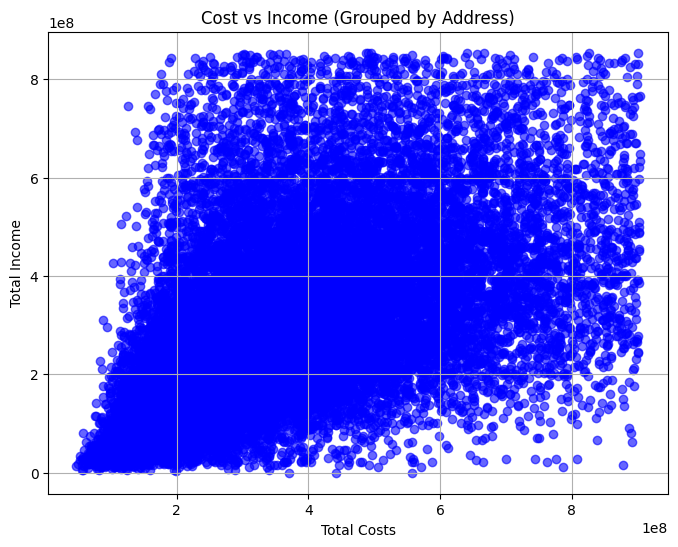

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(merged_df_98['Cost_Sum'], merged_df_98['Income_Sum'], color='blue', alpha=0.6)
plt.title('Cost vs Income (Grouped by Address)')
plt.xlabel('Total Costs')
plt.ylabel('Total Income')
plt.grid(True)
plt.show()

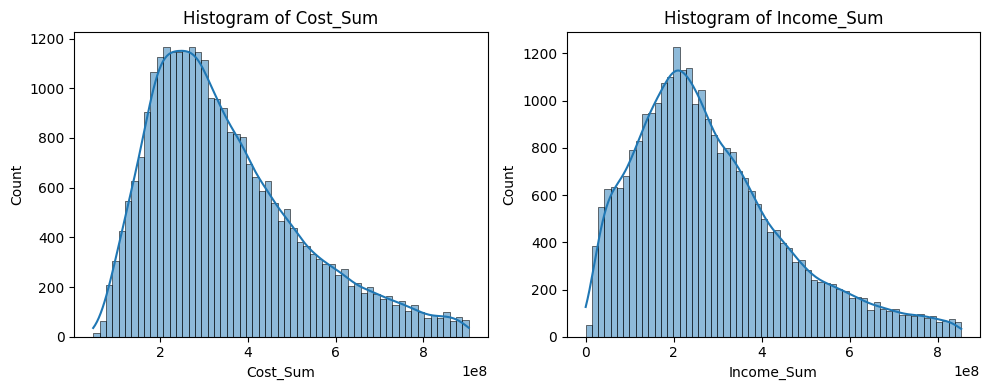

In [ ]:
# Plot a histogram of the data -> positive skewness
import seaborn as sns
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(merged_df_98['Cost_Sum'], kde=True)
plt.title('Histogram of Cost_Sum')
plt.subplot(1, 2, 2)
sns.histplot(merged_df_98['Income_Sum'], kde=True)
plt.title('Histogram of Income_Sum')
plt.tight_layout()
plt.show()

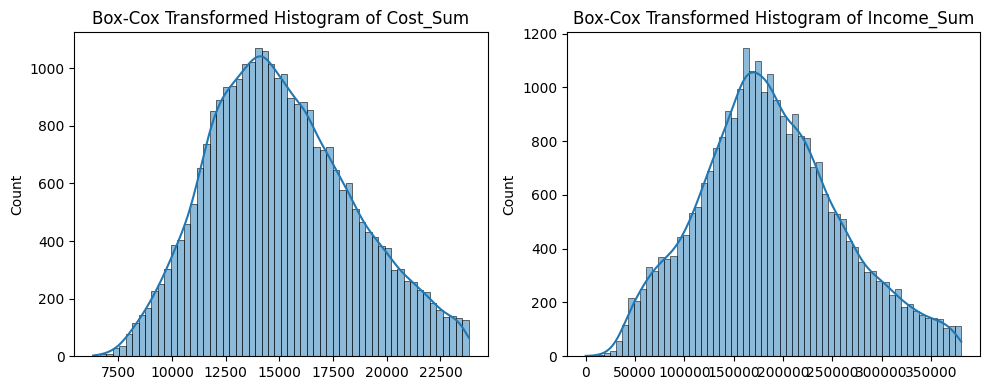

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
cost_sum_transformed = stats.boxcox(merged_df_98['Cost_Sum'] ,lmbda=0.45)
income_sum_transformed = stats.boxcox(merged_df_98['Income_Sum'],lmbda=0.6)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(cost_sum_transformed, kde=True)
plt.title('Box-Cox Transformed Histogram of Cost_Sum')

plt.subplot(1, 2, 2)
sns.histplot(income_sum_transformed, kde=True)
plt.title('Box-Cox Transformed Histogram of Income_Sum')
plt.tight_layout()
plt.show()

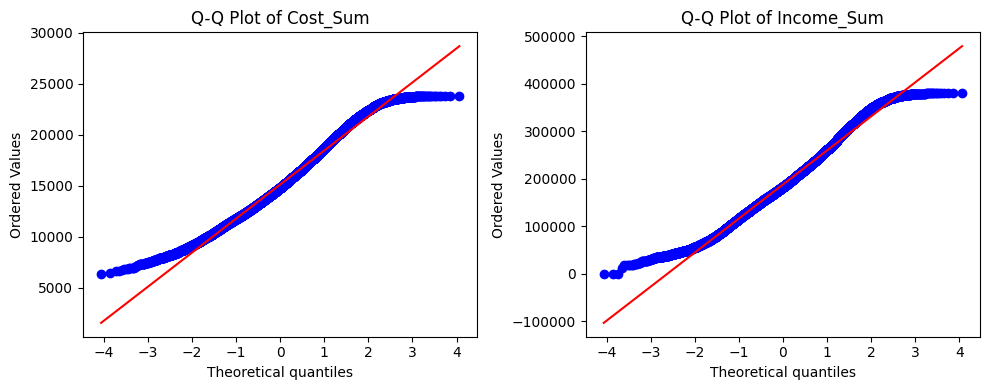

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
stats.probplot(cost_sum_transformed, dist="norm", plot=plt)
plt.title('Q-Q Plot of Cost_Sum')

plt.subplot(1, 2, 2)
stats.probplot(income_sum_transformed, dist="norm", plot=plt)
plt.title('Q-Q Plot of Income_Sum')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# PowerTransformer: For highly skewed data to make it more normal.
#scaler = PowerTransformer(method='yeo-johnson')
scaler = QuantileTransformer(output_distribution='normal')
#scaler = StandardScaler()

X_scaled_98 = scaler.fit_transform(merged_df_98[['Cost_Sum','Income_Sum']])

scaled_df_98 = pd.DataFrame(X_scaled_98, columns=['Cost_Sum', 'Income_Sum'])
scaled_df_98['Address'] = merged_df_98['Address']
scaled_df_98.describe()

,Cost_Sum,Income_Sum,Address
count,28768.000000,28768.000000,2.512200e+04
mean,-0.003467,-0.008699,1.554238e+10
std,0.993428,1.005265,4.772134e+09
min,-5.199338,-5.199338,1.000100e+10
25%,-0.662235,-0.680190,1.130416e+10
50%,-0.007238,-0.008083,1.270433e+10
75%,0.654009,0.673290,2.080648e+10
max,5.199338,5.199338,2.220963e+10


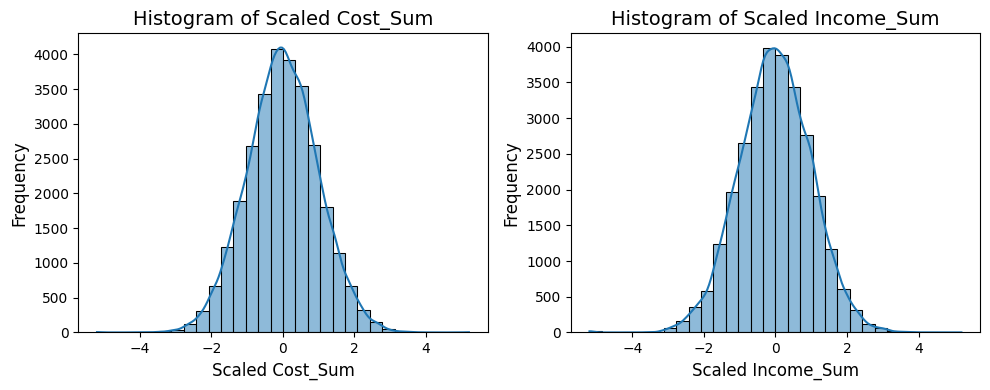

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(scaled_df_98['Cost_Sum'], kde=True, bins=30)
plt.title('Histogram of Scaled Cost_Sum', fontsize=14)
plt.xlabel('Scaled Cost_Sum', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(scaled_df_98['Income_Sum'], kde=True, bins=30)
plt.title('Histogram of Scaled Income_Sum', fontsize=14)
plt.xlabel('Scaled Income_Sum', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

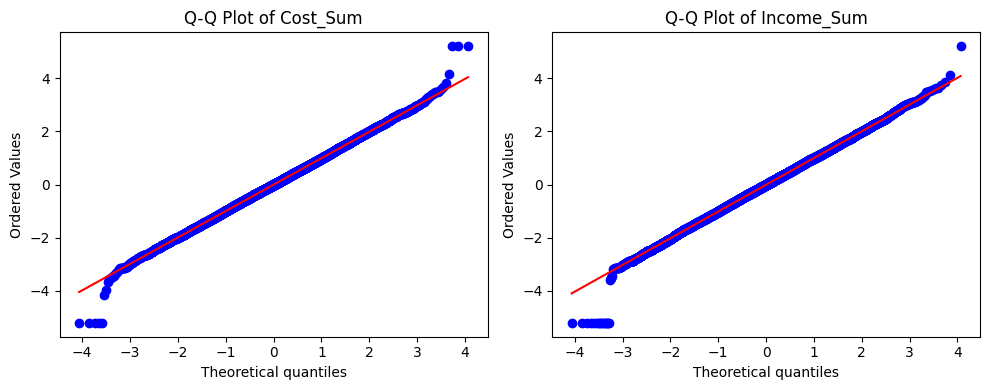

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
stats.probplot(scaled_df_98['Cost_Sum'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Cost_Sum')

plt.subplot(1, 2, 2)
stats.probplot(scaled_df_98['Income_Sum'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Income_Sum')
plt.tight_layout()
plt.show()

In [ ]:
merged_df_98_final = pd.DataFrame({
    'Cost_Sum':scaled_df_98['Cost_Sum'],
    'Income_Sum':scaled_df_98['Income_Sum'],
    'Address' : merged_df_98.Address
})

### Preparing X 1401

In [ ]:
food_combined1401_df =  pd.concat([U1401_food, R1401_food], axis=0, ignore_index=True)
food_combined1401_df = food_combined1401_df[['Address','value']]
food_combined1401_df.rename(columns={'value': 'food_value'}, inplace=True)

food_combined1401_df_grouped = food_combined1401_df.groupby('Address', as_index=False)['food_value'].sum()

In [ ]:
food_combined1401_df_grouped.to_excel('/content/drive/MyDrive/food_combined1401_df.xlsx', index=False)

In [ ]:
drink_combined1401_df =  pd.concat([U1401_drink, R1401_drink], axis=0, ignore_index=True)
drink_combined1401_df = drink_combined1401_df[['Address','value']]
drink_combined1401_df.rename(columns={'value': 'drink_value'}, inplace=True)

drink_combined1401_df_grouped = drink_combined1401_df.groupby('Address', as_index=False)['drink_value'].sum()

In [ ]:
drink_combined1401_df_grouped.to_excel('/content/drive/MyDrive/drink_combined1401_df.xlsx', index=False)

In [ ]:
clothing_combined1401_df =  pd.concat([U1401_clothing, R1401_clothing], axis=0, ignore_index=True)
clothing_combined1401_df = clothing_combined1401_df[['Address','value']]
clothing_combined1401_df.rename(columns={'value': 'clothing_value'}, inplace=True)

clothing_combined1401_df_grouped = clothing_combined1401_df.groupby('Address', as_index=False)['clothing_value'].sum()

In [ ]:
clothing_combined1401_df_grouped.to_excel('/content/drive/MyDrive/clothing_combined1401_df.xlsx', index=False)

In [ ]:
investments_combined1401_df =  pd.concat([U1401_investments, R1401_investments], axis=0, ignore_index=True)
investments_combined1401_df = investments_combined1401_df[['Address','value']]
investments_combined1401_df.rename(columns={'value': 'investment_value'}, inplace=True)

investments_combined1401_df_grouped = investments_combined1401_df.groupby('Address', as_index=False)['investment_value'].sum()

In [ ]:
investments_combined1401_df_grouped.to_excel('/content/drive/MyDrive/investments_combined1401_df.xlsx', index=False)

In [ ]:
health_combined1401_df =  pd.concat([U1401_health, R1401_health], axis=0, ignore_index=True)
health_combined1401_df = health_combined1401_df[['Address','value']]
health_combined1401_df.rename(columns={'value': 'health_value'}, inplace=True)

health_combined1401_df_grouped = health_combined1401_df.groupby('Address', as_index=False)['health_value'].sum()

In [ ]:
health_combined1401_df_grouped.to_excel('/content/drive/MyDrive/health_combined1401_df.xlsx', index=False)

In [ ]:
remained_combined1401_df = df_1401_remaining_cost[['1401_Address','1401_value']]#[['Address','remained_value']]
remained_combined1401_df.rename(columns={'1401_value': 'remained_value'}, inplace=True)
remained_combined1401_df.rename(columns={'1401_Address': 'Address'}, inplace=True)

remained_combined1401_df_grouped = remained_combined1401_df.groupby('Address', as_index=False)['remained_value'].sum()
remained_combined1401_df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37721 entries, 0 to 37720
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Address         37721 non-null  object
 1   remained_value  37721 non-null  object
dtypes: object(2)
memory usage: 589.5+ KB


In [ ]:
remained_combined1401_df_grouped.to_excel('/content/drive/MyDrive/remained_combined1401_df.xlsx', index=False)

In [ ]:
housing_costs_combined1401_df =  pd.concat([U1401_housing_costs, R1401_housing_costs], axis=0, ignore_index=True)
housing_costs_combined1401_df = housing_costs_combined1401_df[['Address','value']]
housing_costs_combined1401_df.rename(columns={'value': 'housing_costs_value'}, inplace=True)

restaurant_combined1401_df =  pd.concat([U1401_restaurant, R1401_restaurant], axis=0, ignore_index=True)
restaurant_combined1401_df = restaurant_combined1401_df[['Address','value']]
restaurant_combined1401_df.rename(columns={'value': 'restaurant_value'}, inplace=True)

U1401_other['value_i'] = pd.to_numeric(U1401_other['value'], errors='coerce').fillna(0).astype(int)
R1401_other['value_i'] = pd.to_numeric(R1401_other['value'], errors='coerce').fillna(0).astype(int)

other_combined1401_df =  pd.concat([U1401_other, R1401_other], axis=0, ignore_index=True)
other_combined1401_df = other_combined1401_df[['Address','value_i']]
other_combined1401_df.rename(columns={'value': 'others'}, inplace=True)

In [ ]:
housing_costs_combined1401_df_grouped = housing_costs_combined1401_df.groupby('Address', as_index=False)['housing_costs_value'].sum()
restaurant_combined1401_df_grouped = restaurant_combined1401_df.groupby('Address', as_index=False)['restaurant_value'].sum()
other_combined1401_df_grouped = other_combined1401_df.groupby('Address', as_index=False)['value_i'].sum()

In [ ]:
restaurant_combined1401_df_grouped.to_excel('/content/drive/MyDrive/restaurant_combined1401_df.xlsx', index=False)
housing_costs_combined1401_df_grouped.to_excel('/content/drive/MyDrive/housing_costs_combined1401_df.xlsx', index=False)
other_combined1401_df_grouped.to_excel('/content/drive/MyDrive/other_combined1401_df.xlsx', index=False)

In [ ]:
import pandas as pd
health_combined1401_df_grouped = pd.read_excel('/content/drive/MyDrive/health_combined1401_df.xlsx')
other_combined1401_df_grouped = pd.read_excel('/content/drive/MyDrive/other_combined1401_df.xlsx')
drink_combined1401_df_grouped = pd.read_excel('/content/drive/MyDrive/drink_combined1401_df.xlsx')
food_combined1401_df_grouped = pd.read_excel('/content/drive/MyDrive/food_combined1401_df.xlsx')
restaurant_combined1401_df_grouped= pd.read_excel('/content/drive/MyDrive/restaurant_combined1401_df.xlsx')
investments_combined1401_df_grouped= pd.read_excel('/content/drive/MyDrive/investments_combined1401_df.xlsx')
housing_costs_combined1401_df_grouped= pd.read_excel('/content/drive/MyDrive/housing_costs_combined1401_df.xlsx')
clothing_combined1401_df_grouped = pd.read_excel('/content/drive/MyDrive/clothing_combined1401_df.xlsx')
remained_combined1401_df_grouped = pd.read_excel('/content/drive/MyDrive/remained_combined1401_df.xlsx')

In [ ]:
df_allcost_1401 = pd.merge(food_combined1401_df_grouped, other_combined1401_df_grouped, on='Address', how='outer') #38196, 38172
df_allcost_1401 = df_allcost_1401.merge(housing_costs_combined1401_df_grouped, on='Address', how='outer') # 38328
df_allcost_1401 = df_allcost_1401.merge(remained_combined1401_df_grouped, on='Address', how='outer') # 38104
df_allcost_1401 = df_allcost_1401.merge(drink_combined1401_df_grouped, on='Address', how='outer')
df_allcost_1401 = df_allcost_1401.merge(restaurant_combined1401_df_grouped, on='Address', how='outer')
df_allcost_1401 = df_allcost_1401.merge(clothing_combined1401_df_grouped, on='Address', how='outer')
df_allcost_1401 = df_allcost_1401.merge(investments_combined1401_df_grouped, on='Address', how='outer')
df_allcost_1401 = df_allcost_1401.merge(health_combined1401_df_grouped, on='Address', how='outer')
df_allcost_1401.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37951 entries, 0 to 37950
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              37951 non-null  int64  
 1   food_value           37832 non-null  float64
 2   value_i              37683 non-null  float64
 3   housing_costs_value  37951 non-null  int64  
 4   remained_value       37721 non-null  float64
 5   drink_value          6351 non-null   float64
 6   restaurant_value     9524 non-null   float64
 7   clothing_value       16597 non-null  float64
 8   investment_value     3891 non-null   float64
 9   health_value         24901 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 2.9 MB


In [ ]:
df_allcost_1401_cleaned = df_allcost_1401.dropna(thresh=df_allcost_1401.shape[1] - 4)
df_allcost_1401_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31123 entries, 0 to 37894
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              31123 non-null  int64  
 1   food_value           31113 non-null  float64
 2   value_i              31089 non-null  float64
 3   housing_costs_value  31123 non-null  int64  
 4   remained_value       31121 non-null  float64
 5   drink_value          6338 non-null   float64
 6   restaurant_value     9520 non-null   float64
 7   clothing_value       16591 non-null  float64
 8   investment_value     3874 non-null   float64
 9   health_value         24785 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 2.6 MB


In [ ]:
# dahak ha
dahak_cost = df_allcost_1401_cleaned.groupby('Address')[['remained_value','food_value', 'value_i', 'housing_costs_value']].sum()
dahak_cost['total'] = dahak_cost['food_value']+dahak_cost['value_i']+dahak_cost['housing_costs_value']
quartiles = dahak_cost['total'].quantile(np.arange(0.1, 1, 0.1))
quartiles.values[0]

36442931.2

In [ ]:
def rank_by_quartile(value):
  if value <= quartiles.values[0]:
    return 1
  elif value <= quartiles.values[1]:
      return 2
  elif value <= quartiles.values[2]:
      return 3
  elif value <= quartiles.values[3]:
      return 4
  elif value <= quartiles.values[4]:
      return 5
  elif value <= quartiles.values[5]:
      return 6
  elif value <= quartiles.values[6]:
      return 7
  elif value <= quartiles.values[7]:
      return 8
  elif value <= quartiles.values[8]:
      return 9
  else:
      return 10

dahak_cost['rank'] =  dahak_cost['total'].apply(rank_by_quartile)
df_allcost_1401_cleaned = df_allcost_1401_cleaned.merge(dahak_cost[['rank']], left_on='Address', right_index=True, how='left')
df_allcost_1401_cleaned.head()

,Address,food_value,value_i,housing_costs_value,remained_value,drink_value,restaurant_value,clothing_value,investment_value,health_value,rank
0,10001000126,19880000.0,1.116000e+09,38000000,12780000.0,NaN,5000000.0,NaN,NaN,27100000.0,10
1,10001000130,41070000.0,6.257200e+07,43590000,2680000.0,NaN,NaN,NaN,NaN,3800000.0,5
2,10001000132,46990000.0,5.158000e+07,48900000,8750000.0,NaN,2000000.0,NaN,NaN,5500000.0,5
4,10001000138,48160000.0,5.384000e+08,50350000,9480000.0,NaN,NaN,3500000.0,NaN,3700000.0,10
5,10001000141,24850000.0,4.104400e+08,67630000,6110000.0,NaN,2300000.0,5000000.0,NaN,5500000.0,9


In [ ]:
def fill_na_with_rank_mode(df):
    for col in df.columns:
        if df[col].isna().sum() > 0:
            mode_per_rank = df.groupby('rank')[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
            df[col] = df.apply(lambda row: row[col] if pd.notna(row[col])
                               else mode_per_rank[row['rank']], axis=1)
    return df

# non haru ba mode dahak por kn
df_allcost_1401_cleaned_final = fill_na_with_rank_mode(df_allcost_1401_cleaned)

In [ ]:
df_allcost_1401_cleaned_final.to_excel('/content/drive/MyDrive/df_allcost_1401_cleaned.xlsx', index=False)

In [ ]:
df_allcost_1401_final = pd.read_excel('/content/drive/MyDrive/df_allcost_1401_cleaned.xlsx')

### Preparing Y 1401

In [ ]:
df_allincome_1401 = pd.concat([income_types[3] , income_types[7] ], axis =0)
df_allincome_1401.to_excel('/content/drive/MyDrive/df_allincome_1401.xlsx', index=False)
df_allincome_1401.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37937 entries, 0 to 19556
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           37937 non-null  int64  
 1   subsidy           37937 non-null  float64
 2   other incomes     37937 non-null  float64
 3   corrected_income  37937 non-null  float64
 4   netincome_w_y     37937 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.7 MB


In [ ]:
df_allincome_1401_final = pd.read_excel('/content/drive/MyDrive/df_allincome_1401.xlsx')

### Preparing 1401 df

In [ ]:
df_allcost_1401_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31123 entries, 0 to 31122
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Address              31123 non-null  int64
 1   food_value           31123 non-null  int64
 2   value_i              31123 non-null  int64
 3   housing_costs_value  31123 non-null  int64
 4   remained_value       31123 non-null  int64
 5   drink_value          31123 non-null  int64
 6   restaurant_value     31123 non-null  int64
 7   clothing_value       31123 non-null  int64
 8   investment_value     31123 non-null  int64
 9   health_value         31123 non-null  int64
 10  rank                 31123 non-null  int64
dtypes: int64(11)
memory usage: 2.6 MB


In [ ]:
df_allcost_1401_final['food_value'] = df_allcost_1401_final['food_value']*12
df_allcost_1401_final['remained_value'] = df_allcost_1401_final['remained_value']*12
df_allcost_1401_final['housing_costs_value'] = df_allcost_1401_final['housing_costs_value']*12
df_allcost_1401_final['drink_value'] = df_allcost_1401_final['drink_value']*12
df_allcost_1401_final['restaurant_value'] = df_allcost_1401_final['restaurant_value']*12
df_allcost_1401_final['clothing_value'] = df_allcost_1401_final['clothing_value'] *12
df_allcost_1401_final['health_value']= df_allcost_1401_final['health_value'] * 12

X_1401 = df_allcost_1401_final.drop(columns=['Address']).sum(axis=1)
X_ready_1401 = pd.DataFrame({'Address': df_allcost_1401_final['Address'], 'Cost_Sum': X_1401})
X_ready_1401.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31123 entries, 0 to 31122
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Address   31123 non-null  int64
 1   Cost_Sum  31123 non-null  int64
dtypes: int64(2)
memory usage: 486.4 KB


In [ ]:
y_1401 = df_allincome_1401_final.drop(columns=['Address']).sum(axis=1)
y_ready_1401 = pd.DataFrame({'Address': df_allincome_1401_final['Address'], 'Income_Sum': y_1401})
y_ready_1401.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37937 entries, 0 to 37936
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     37937 non-null  int64  
 1   Income_Sum  37937 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 592.9 KB


In [ ]:
merged_df_1401 = pd.merge(X_ready_1401,y_ready_1401, on='Address')
merged_df_1401.describe()

,Address,Cost_Sum,Income_Sum
count,3.111800e+04,3.111800e+04,3.111800e+04
mean,1.630276e+10,1.206865e+09,1.347911e+09
std,5.038674e+09,1.323739e+09,3.351439e+09
min,1.000100e+10,7.507439e+07,0.000000e+00
25%,1.140743e+10,6.257982e+08,5.695600e+08
50%,1.290536e+10,9.565770e+08,8.863100e+08
75%,2.130854e+10,1.428864e+09,1.360538e+09
max,2.300671e+10,8.248196e+10,2.459548e+11


In [ ]:
quantile_income_up = merged_df_1401['Income_Sum'].quantile(0.75)
quantile_cost_up = merged_df_1401['Cost_Sum'].quantile(0.75)
quantile_income_dn = merged_df_1401['Income_Sum'].quantile(0.25)
quantile_cost_dn = merged_df_1401['Cost_Sum'].quantile(0.25)
IQR_cost = quantile_cost_up - quantile_cost_dn
IQR_income = quantile_income_up - quantile_income_dn

merged_df_1401 = merged_df_1401[(merged_df_1401['Income_Sum'] <= quantile_income_up + 1.5*IQR_income) &
                            (merged_df_1401['Income_Sum'] >= quantile_income_dn - 1.5*IQR_income)&
                            (merged_df_1401['Cost_Sum'] <= quantile_cost_up + 1.5*IQR_cost)&
                            (merged_df_1401['Cost_Sum'] >= quantile_cost_dn - 1.5*IQR_cost)&
                            (merged_df_1401['Income_Sum'] >= 0)]
merged_df_1401.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27472 entries, 0 to 31117
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Address     27472 non-null  int64  
 1   Cost_Sum    27472 non-null  int64  
 2   Income_Sum  27472 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 858.5 KB


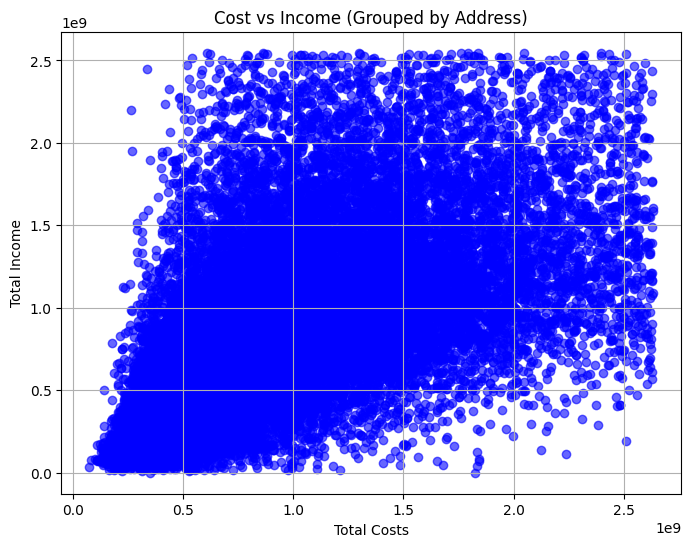

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(merged_df_1401['Cost_Sum'], merged_df_1401['Income_Sum'], color='blue', alpha=0.6)
plt.title('Cost vs Income (Grouped by Address)')
plt.xlabel('Total Costs')
plt.ylabel('Total Income')
plt.grid(True)
plt.show()

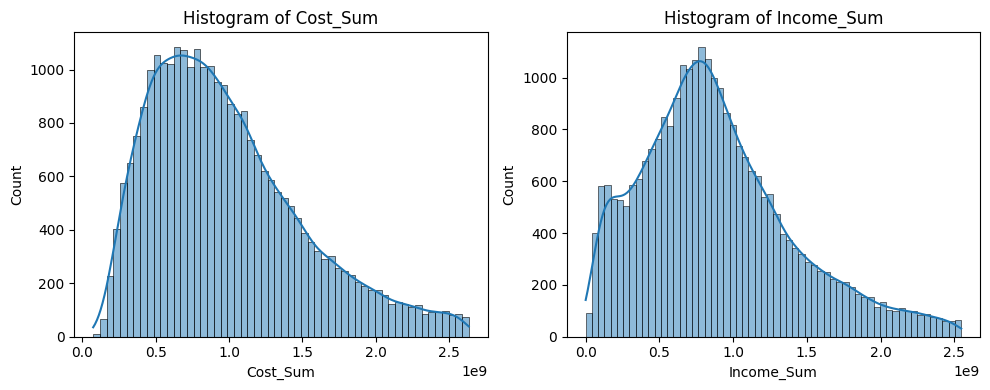

In [ ]:
# Plot a histogram of the data
import seaborn as sns
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(merged_df_1401['Cost_Sum'], kde=True)
plt.title('Histogram of Cost_Sum')
plt.subplot(1, 2, 2)
sns.histplot(merged_df_1401['Income_Sum'], kde=True)
plt.title('Histogram of Income_Sum')
plt.tight_layout()
plt.show()

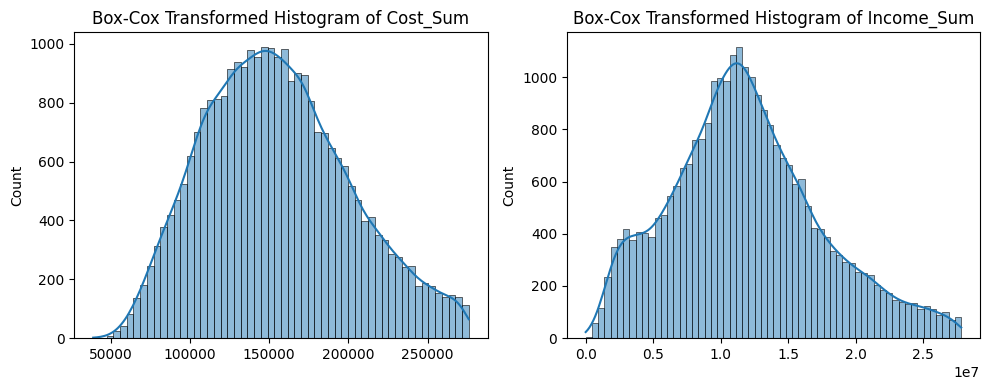

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
cost_sum_transformed_1401 = stats.boxcox(merged_df_1401['Cost_Sum'] ,lmbda=0.55)
income_sum_transformed_1401 = stats.boxcox(merged_df_1401['Income_Sum'],lmbda=0.78 )

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(cost_sum_transformed_1401, kde=True)
plt.title('Box-Cox Transformed Histogram of Cost_Sum')

plt.subplot(1, 2, 2)
sns.histplot(income_sum_transformed_1401, kde=True)
plt.title('Box-Cox Transformed Histogram of Income_Sum')
plt.tight_layout()
plt.show()

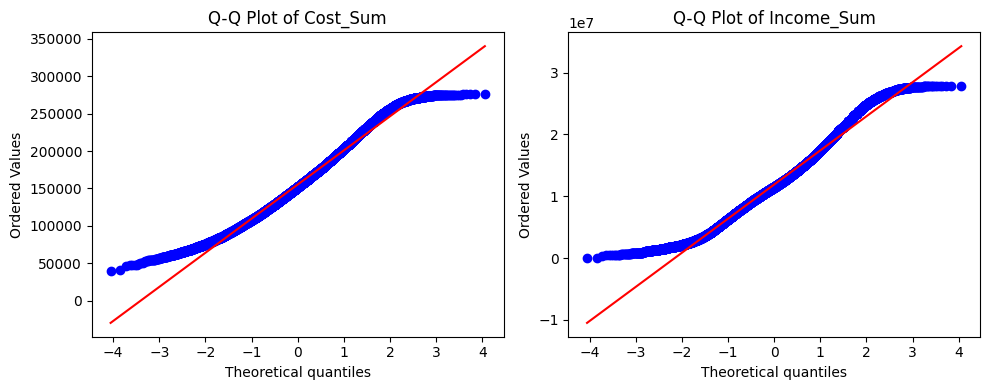

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
stats.probplot(cost_sum_transformed_1401, dist="norm", plot=plt)
plt.title('Q-Q Plot of Cost_Sum')

plt.subplot(1, 2, 2)
stats.probplot(income_sum_transformed_1401, dist="norm", plot=plt)
plt.title('Q-Q Plot of Income_Sum')
plt.tight_layout()
plt.show()

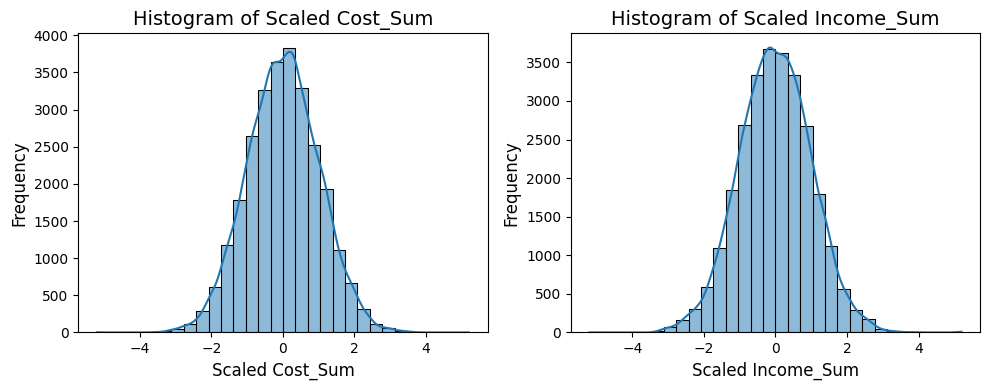

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# PowerTransformer: For highly skewed data to make it more normal.
scaler = QuantileTransformer(output_distribution='normal')
X_scaled_1401 = scaler.fit_transform(merged_df_1401[['Cost_Sum', 'Income_Sum']])

scaled_df_1401 = pd.DataFrame(X_scaled_1401, columns=['Cost_Sum', 'Income_Sum'])
scaled_df_1401['Address'] = merged_df_1401['Address']
scaled_df_1401.describe()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(scaled_df_1401['Cost_Sum'], kde=True, bins=30)
plt.title('Histogram of Scaled Cost_Sum', fontsize=14)
plt.xlabel('Scaled Cost_Sum', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(scaled_df_1401['Income_Sum'], kde=True, bins=30)
plt.title('Histogram of Scaled Income_Sum', fontsize=14)
plt.xlabel('Scaled Income_Sum', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
merged_df_1401_final = pd.DataFrame({
    'cost_sum_std':scaled_df_1401['Cost_Sum'],
    'income_sum_std':scaled_df_1401['Income_Sum'],
    'Address': merged_df_1401.Address
})

### merge 1401, 98

In [ ]:
merged_df_1401_prefixed = merged_df_1401_final.add_prefix('1401_')
merged_df_98_prefixed = merged_df_98_final.add_prefix('98_')

merged_df = pd.concat([merged_df_1401_prefixed, merged_df_98_prefixed], axis=1)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32659 entries, 0 to 32762
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   1401_cost_sum_std    27472 non-null  float64
 1   1401_income_sum_std  27472 non-null  float64
 2   1401_Address         27472 non-null  float64
 3   98_Cost_Sum          28768 non-null  float64
 4   98_Income_Sum        28768 non-null  float64
 5   98_Address           28768 non-null  float64
dtypes: float64(6)
memory usage: 1.7 MB


In [ ]:
addresses_1401 = merged_df['1401_Address']
addresses_98 = merged_df['98_Address']

common_addresses = pd.Series(list(set(addresses_1401).intersection(set(addresses_98))))
common_addresses

,0


In [ ]:
merged_df.to_excel('/content/drive/MyDrive/merged_df_401_98.xlsx', index=False)

In [235]:
import numpy as np
merged_df = pd.read_excel('/content/drive/MyDrive/merged_df_401_98.xlsx')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32659 entries, 0 to 32658
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   1401_cost_sum_std    27472 non-null  float64
 1   1401_income_sum_std  27472 non-null  float64
 2   1401_Address         27472 non-null  float64
 3   98_Cost_Sum          28768 non-null  float64
 4   98_Income_Sum        28768 non-null  float64
 5   98_Address           28768 non-null  float64
dtypes: float64(6)
memory usage: 1.5 MB


In [ ]:
df_1401 = merged_df[['1401_Address', '1401_income_sum_std', '1401_cost_sum_std']].copy()
df_1401.columns = ['Address', 'Income', 'Cost']

df_98 = merged_df[['98_Address', '98_Income_Sum', '98_Cost_Sum']].copy()
df_98.columns = ['Address', 'Income', 'Cost']

df_combined = pd.concat([df_1401, df_98], ignore_index=True)

In [ ]:
df_combined.to_excel('/content/drive/MyDrive/df_combined_401_98.xlsx', index=False)

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65318 entries, 0 to 65317
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  56240 non-null  float64
 1   Income   56240 non-null  float64
 2   Cost     56240 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


In [ ]:
df_combined.shape

(65318, 3)

In [ ]:
df_combined.isnull()

,Address,Income,Cost
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,True,False,False
...,...,...,...
65313,False,True,True
65314,False,True,True
65315,False,True,True
65316,False,True,True


In [ ]:
df_combined = df_combined[~(df_combined['Income'].isna() & df_combined['Cost'].isna())]


In [ ]:
df_combined.isnull()

,Address,Income,Cost
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,True,False,False
...,...,...,...
63624,False,False,False
63625,False,False,False
63626,True,False,False
63627,True,False,False


In [ ]:
df_combined['Address'].isnull().sum()

7029

In [ ]:
address_without_nan = df_combined['Address'].dropna()
address_counts = address_without_nan.value_counts()
duplicate_addresses = address_counts[address_counts > 1]
duplicate_addresses

,count
Address,


### K means 98,1401

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


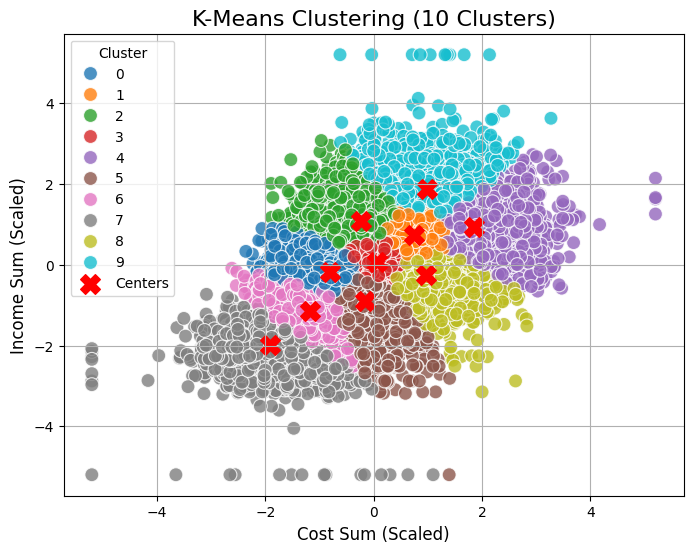

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(df_combined[['Cost', 'Income']])
df_combined['Cluster_km'] = clusters

plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_combined,
    x='Cost', y='Income',
    hue='Cluster_km', palette='tab10', marker='o', s=100, alpha=0.8
)

centers = kmeans.cluster_centers_
# centers_scaled = scaler.inverse_transform(centers)  # -> To Inverse the transform to original scale
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centers')

plt.title('K-Means Clustering (10 Clusters)', fontsize=16)
plt.xlabel('Cost Sum (Scaled)', fontsize=12)
plt.ylabel('Income Sum (Scaled)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)

plt.show()

### wcss

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

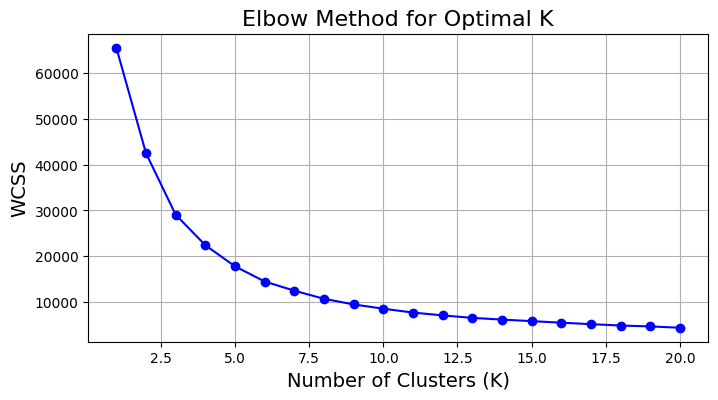

In [ ]:
wcss = []
k_range = range(1, 21)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
wcss = []
k_range = range(1, 21)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.grid(True)
plt.show()

# DBSCAN

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32659 entries, 0 to 32658
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   1401_cost_sum_std    27472 non-null  float64
 1   1401_income_sum_std  27472 non-null  float64
 2   1401_Address         27472 non-null  float64
 3   98_Cost_Sum          28768 non-null  float64
 4   98_Income_Sum        28768 non-null  float64
 5   98_Address           28768 non-null  float64
dtypes: float64(6)
memory usage: 1.5 MB


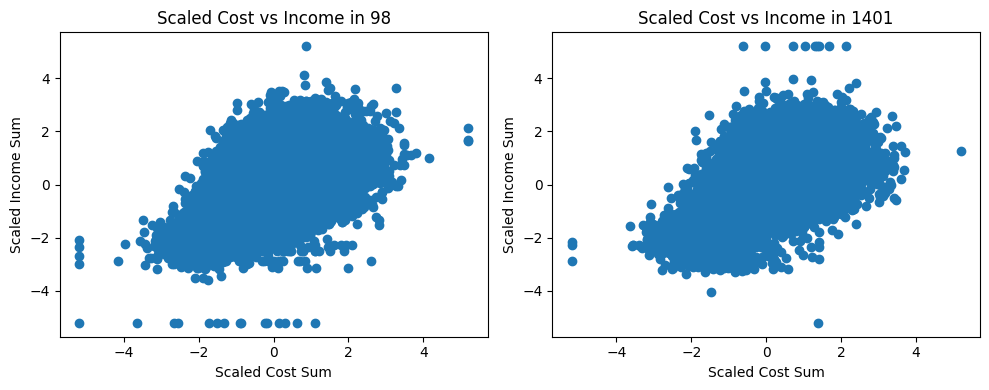

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.scatter(merged_df['98_Cost_Sum'], merged_df['98_Income_Sum'])
plt.title('Scaled Cost vs Income in 98')
plt.xlabel('Scaled Cost Sum')
plt.ylabel('Scaled Income Sum')
plt.subplot(1,2,2)
plt.scatter(merged_df['1401_cost_sum_std'], merged_df['1401_income_sum_std'])
plt.title('Scaled Cost vs Income in 1401')
plt.xlabel('Scaled Cost Sum')
plt.ylabel('Scaled Income Sum')
plt.tight_layout()
plt.show()

In [236]:
dbscan_df = pd.DataFrame({
'cost' : pd.concat([merged_df['98_Cost_Sum'], merged_df['1401_cost_sum_std']], axis=0, ignore_index=True),
'income': pd.concat([merged_df['98_Income_Sum'], merged_df['1401_income_sum_std']], axis=0, ignore_index=True)})
dbscan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65318 entries, 0 to 65317
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cost    56240 non-null  float64
 1   income  56240 non-null  float64
dtypes: float64(2)
memory usage: 1020.7 KB


In [237]:
dbscan_df = dbscan_df.dropna()

In [243]:
# with Silhouete
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = np.arange(0.11, 0.15, 0.01)
min_samples_values = range(8,9)
best_eps = None
best_min_samples = None
best_silhouette = 0
best_clusters = None
dbscan_df = dbscan_df.dropna()

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(dbscan_df)
        num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        silhouette_avg = silhouette_score(dbscan_df, clusters)
        print(f"cls:{num_clusters} , sil_sc:{silhouette_avg} , eps_values:{eps}, min_samples:{min_samples}  " )
        if num_clusters == 10:
            try:
                if silhouette_avg > best_silhouette:
                    best_eps = eps
                    best_min_samples = min_samples
                    best_silhouette = silhouette_avg
                    best_clusters = clusters
                    print('====')
                    print(f"Best eps: {best_eps}")
                    print(f"Best min_samples: {best_min_samples}")
                    print(f"Best silhouette score: {best_silhouette}")
                    print('====')
            except:
                # In case silhouette score calculation fails
                continue

print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best silhouette score: {best_silhouette}")

cls:11 , sil_sc:-0.002999209964980209 , eps_values:0.11, min_samples:8  
cls:8 , sil_sc:0.032835514837799264 , eps_values:0.12, min_samples:8  
cls:10 , sil_sc:0.03297820930874596 , eps_values:0.13, min_samples:8  
====
Best eps: 0.13
Best min_samples: 8
Best silhouette score: 0.03297820930874596
====
cls:9 , sil_sc:0.08768949126066973 , eps_values:0.13999999999999999, min_samples:8  
Best eps: 0.13
Best min_samples: 8
Best silhouette score: 0.03297820930874596


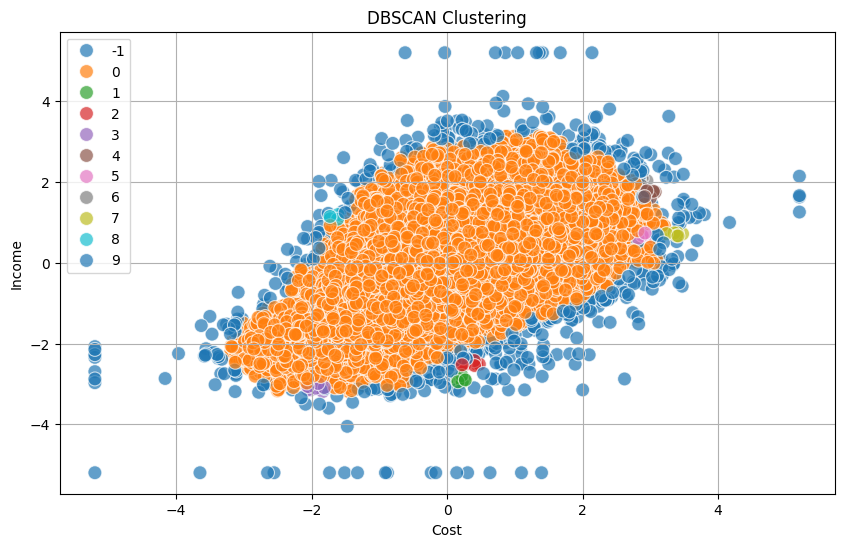

In [ ]:
dbscan_df['Cluster'] = best_clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dbscan_df, x='cost', y='income', hue='Cluster', palette='tab10', marker='o', s=100, alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Cost')
plt.ylabel('Income')
plt.legend()
plt.grid(True)
plt.show()

# Prediction

Costs

In [ ]:
base_path = '/content/drive/MyDrive/Project1_data.zip (Unzipped Files)/'

files = ['R98', 'R99', 'R1400', 'R1401', 'U98', 'U99', 'U1400', 'U1401']
costs = ['food', 'tobacco', 'clothing', 'housing', 'furniture',
         'healthcare', 'transportation', 'comm', 'leisure', 'food2', 'other']

total_costs = []

for file in files:
    file_path = f'{base_path}{file}.xlsx'

    sheet_names = [f'{file}P3S01', f'{file}P3S02', f'{file}P3S03', f'{file}P3S04',
                   f'{file}P3S05', f'{file}P3S06', f'{file}P3S07', f'{file}P3S08', f'{file}P3S09',
                   f'{file}P3S11', f'{file}P3S12']

    dfs = []
    for sheet_name, column_name in zip(sheet_names, costs):
        df = pd.read_excel(file_path, sheet_name=sheet_name)
        df['cost_type'] = column_name
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df = combined_df.drop(columns=['code', 'purchased'])

    result_df = combined_df.pivot_table(index='Address', columns='cost_type', values='value', aggfunc='sum').reset_index()

    total_costs.append(result_df)

total_costs[0]['year'] = 98
total_costs[1]['year'] = 99
total_costs[2]['year'] = 1400
total_costs[3]['year'] = 1401

total_costs[4]['year'] = 98
total_costs[5]['year'] = 99
total_costs[6]['year'] = 1400
total_costs[7]['year'] = 1401

In [ ]:
total_costs_df = pd.concat(total_costs, ignore_index=True)

total_costs_df.isna().sum()/total_costs_df.shape[0]*100

In [ ]:
total_costs_df = total_costs_df.drop(columns = ['clothing', 'food2', 'healthcare', 'leisure', 'tobacco'])
total_costs_df = total_costs_df.dropna()